# Importing Libraries

In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import emoji
from collections import Counter
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from afinn import Afinn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nltk import ngrams
from nltk.util import ngrams
import matplotlib.dates as mdates
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_regression
from prophet import Prophet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

Importing plotly failed. Interactive plots will not work.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loading the Dataset

Please find the filtered 'Apple' tweets dataset and historical stock data from the google drive link:
https://drive.google.com/drive/folders/15rcd96eoKHFY8PGogogrW3ZVY6E-7ewD?usp=sharing


If the dataset from the Kaggle link (https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/data?select=Tweet.csv) is downloaded, the below code can be uncommented.
Else, using the AAPL_Tweets.csv file and AAPL.csv file uploaded together with the assignment to the google drive link, the below code does not need to be run.

In [ ]:
""" 
# after downloading the dataset from the Kaggle link and extracting the folder,
# give the path to the file 'Tweets.csv'

my_csv = Path(r"C:\Users\DELL\Downloads\archive (4)\Tweet.csv")
df = pd.read_csv(my_csv.resolve(), sep=',')
tweets = pd.read_csv(r"C:\Users\DELL\Downloads\archive (4)\Tweet.csv")

# give the path to the file 'Company_Tweet.csv' from the extracted folder
company_tweet = pd.read_csv(r"C:\Users\DELL\Downloads\archive (4)\Company_Tweet.csv")

# merging the two files on 'tweet_id'
tweets = tweets.merge(company_tweet, how='left', on='tweet_id')

# formatting dates
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date = pd.to_datetime(tweets.date, errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

# filtering rows where ticker_symbol is 'AAPL' to get tweets of 'Apple' only
aapl_tweets = tweets[tweets['ticker_symbol'] == 'AAPL']

# exporting to a csv
aapl_tweets.to_csv(r"C:\Users\DELL\Downloads\AAPL_Tweets.csv", index=False)

print("Filtered data has been exported to AAPL_Tweets.csv")
# this extracted file was uploaded to the google drive link
"""

AAPL_Tweets.csv was extracted using the Kaggle link,


https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020/data?select=Tweet.csv

This dataset has tweets of top companies from the 1st of January 2015 to the 31st of December 2019. It comprises several CSV files, with the primary one being Tweet.csv. This dataset contains over 3 million unique tweets with their information such as tweet id, author of the tweet, post date, the text body of the tweet, and the number of comments, likes, and retweets of tweets matched with the related company. The dataset is designed to help analyze public sentiment, trends, and discussions regarding these companies over the specified period. 

For our assignment, we have chosen Apple Co. as the Publicly Traded Stock. Using that dataset we extracted the tweets belonging only to the company 'Apple' and created a file called AAPLE_Tweets.csv which was uploaded to the google drive.

In [2]:
# reading the file which has tweets of only 'Apple'
aaple_tweets =  pd.read_csv(r"C:\Users\DELL\Downloads\AAPL_Tweets.csv")

In [3]:
# converting the tweets of each day to a list, where the list has all tweets posted on a particular day
new_df = aaple_tweets.groupby('date')['body'].apply(list).reset_index()

# renaming the 'body' column to 'retweet_list'
new_df = new_df.rename(columns={'body': 'tweet_list'})

The above code shows reading the file and converting the tweets of each day to a list, where the list has all tweets posted on a particular day and then the original dataset had a column called ‘body’ and after grouping all tweets to a list per day, we renamed the column as ‘tweet_list’. From this dataset we have only taken the date and tweets column as they are the most useful for us. 

The below code loads the historical stock related data of AAPL and merges the filtered ‘Apple’ tweets dataset on the date.

This was downloaded from Yahoo Finance using the link, 

https://finance.yahoo.com/quote/AAPL/history?period1=1420070400&period2=1577750400 .

This same file was uploaded together with the filtered AAPL_Tweets.csv to the google drive as AAPL.csv.
Here it has stock data from 1st of January 2015 to 31st of December 2019. This dataset contains daily Open, High, Low, Close, Adj Close and Volume.

In [4]:
# loading the stocks file downloaded from Yahoo Finance
stock_price = pd.read_csv(r"C:\Users\DELL\Downloads\AAPL.csv")

# merging both filtered tweets file and stock files on date
df = pd.merge(new_df, stock_price, left_on='date', right_on='Date', how='left')

Overall, the code loads a dataset of Apple-related tweets and another dataset containing historical stock prices for Apple Inc. The tweets dataset is grouped by the 'date' column, and the 'body' of the tweets is aggregated into lists for each date. This results in a new DataFrame where each row corresponds to a specific date and contains a list of tweets for that date. The 'body' column is then renamed to 'tweet_list' for clarity and then merged with the historical stock prices for Apple Inc.


In [5]:
print(df.head())

         date                                         tweet_list        Date   
0  2015-01-01  [lx21 made $10,008  on $AAPL -Check it out! ht...         NaN  \
1  2015-01-02  [Either way you're a winnah. RT @dbbrakebill: ...  2015-01-02   
2  2015-01-03  [“Icycle: On Thin Ice” is this week’s free App...         NaN   
3  2015-01-04  [Today in 1977 - Apple Computer is incorporate...         NaN   
4  2015-01-05  [Stock Contest!! Pick $AAPL and WIN a FREE Tab...  2015-01-05   

      Open       High        Low    Close  Adj Close       Volume  
0      NaN        NaN        NaN      NaN        NaN          NaN  
1  27.8475  27.860001  26.837500  27.3325  24.402174  212818400.0  
2      NaN        NaN        NaN      NaN        NaN          NaN  
3      NaN        NaN        NaN      NaN        NaN          NaN  
4  27.0725  27.162500  26.352501  26.5625  23.714724  257142000.0  


Based on the merged data frame we have the columns ‘date’, ‘tweet_list’, ‘Open’, ‘High’, ‘Low’, ‘Close’, ‘Adjusted Close’ and ‘Volume’. These represents,

-> date: This column represents the specific date for each record in the DataFrame.

-> tweet_list: This column contains a list of tweets related to Apple Co. relevant to the specific date.

-> Open: This column shows the stock's opening price on the given date.

-> High: This column indicates the highest price the stock reached during the trading day.

-> Low: This column specifies the lowest price the stock reached during the trading day.

-> Close: This column represents the stock's closing price at the end of the trading day.

-> Adjusted Close: This column reflects the stock's closing price adjusted for corporate actions like dividends, stock splits, etc.

-> Volume: This column indicates the total number of shares traded during the trading day.

# Validating Data Integrity

This is to ensure the data is in correct formatting and that tweets are in a list

In [6]:
specific_date = '2015-01-01'

if specific_date in new_df['date'].values:
    # extracting tweet list of that day
    retweet_list = new_df[new_df['date'] == specific_date]['tweet_list'].iloc[0]
    
    # to confirm tweet_list is a list
    print(type(retweet_list)) 
    
    # getting the 2nd tweet of that specific date
    second_tweet = retweet_list[1]
    print(second_tweet) 
else:
    print(f"Date {specific_date} not found in the DataFrame.")

<class 'list'>
Insanity of today weirdo massive selling. $aapl bid up 45 cents after hours after non stop selling in trading hours


This validates the data and the class 'list' shows that it's in correct formatting, where the code checks if a specific date exists in the DataFrame and extracts the list of tweets for that date. The type of the extracted list is confirmed, and the second tweet is printed. This step is essential for validating data integrity and ensuring the tweets are correctly formatted for further analysis.

The below code gets all the third tweet from the list for all the rows

In [7]:
third_element = df['tweet_list'].apply(lambda x: x[2])

print(third_element)

0       Swing Trading: Up To 8.91% Return In 14 Days h...
1       .@BenBajarin @counternotions @GlennF Thankful ...
2       #Apple 's $AAPL watch probably won't be 'home ...
3       What to expect from Apple in 2015 beyond its s...
4       @uwoChristian @BangYman Oh, pushing $AAPL brin...
                              ...                        
1814            $aapl below 290 would accelerate the drop
1815    CityFALCON score gives top rated news for FREE...
1816    Still holding 125 shares of $AAPL since March ...
1817    CityFALCON score gives top rated news for FREE...
1818    $AAPL is the star of the option plans still wi...
Name: tweet_list, Length: 1819, dtype: object


# Data Exploration

In [8]:
df.shape

(1819, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1819 non-null   object 
 1   tweet_list  1819 non-null   object 
 2   Date        1254 non-null   object 
 3   Open        1254 non-null   float64
 4   High        1254 non-null   float64
 5   Low         1254 non-null   float64
 6   Close       1254 non-null   float64
 7   Adj Close   1254 non-null   float64
 8   Volume      1254 non-null   float64
dtypes: float64(6), object(3)
memory usage: 128.0+ KB


The data frame has a shape of 1819 rows and 9 columns. The df.info() output gives detailed information about the DataFrame's structure and contents. It confirms that the DataFrame has a total of 1,819 entries, indexed from 0 to 1,818. There are 9 columns in the DataFrame. The columns 'date' and 'tweet_list' are of type object and contain 1,819 non-null values, meaning that each entry in the DataFrame has a corresponding date and list of tweets. The 'Date' column, which also has an object data type, has 1,254 non-null values, indicating that stock price information is only available for 1,254 dates. The columns 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume' are all of type float64 and also contain 1,254 non-null values. These columns represent the stock prices and trading volume data. The presence of missing values in these columns suggests that there are 565 dates without corresponding stock price data in the dataset. This detailed structural and content overview is essential for understanding the completeness and type of data available, which is crucial for any subsequent data analysis or preprocessing steps.

***Converting 'date' to datetime format***

In [10]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df.head())

        date                                         tweet_list        Date   
0 2015-01-01  [lx21 made $10,008  on $AAPL -Check it out! ht...         NaN  \
1 2015-01-02  [Either way you're a winnah. RT @dbbrakebill: ...  2015-01-02   
2 2015-01-03  [“Icycle: On Thin Ice” is this week’s free App...         NaN   
3 2015-01-04  [Today in 1977 - Apple Computer is incorporate...         NaN   
4 2015-01-05  [Stock Contest!! Pick $AAPL and WIN a FREE Tab...  2015-01-05   

      Open       High        Low    Close  Adj Close       Volume  
0      NaN        NaN        NaN      NaN        NaN          NaN  
1  27.8475  27.860001  26.837500  27.3325  24.402174  212818400.0  
2      NaN        NaN        NaN      NaN        NaN          NaN  
3      NaN        NaN        NaN      NaN        NaN          NaN  
4  27.0725  27.162500  26.352501  26.5625  23.714724  257142000.0  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1819 non-null   datetime64[ns]
 1   tweet_list  1819 non-null   object        
 2   Date        1254 non-null   object        
 3   Open        1254 non-null   float64       
 4   High        1254 non-null   float64       
 5   Low         1254 non-null   float64       
 6   Close       1254 non-null   float64       
 7   Adj Close   1254 non-null   float64       
 8   Volume      1254 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 128.0+ KB


The code snippet initially converts the 'date' column to datetime format, facilitating time-series operations for further analysis. And with the data frame information, we can see that the ‘date’ column has been converted to ‘datetime’ format. This conversion ensures accurate date recognition and manipulation. 

In [12]:
# sorting the data by 'date'
df.sort_values('date', inplace=True)

The DataFrame is then sorted chronologically by the 'date' column, essential for accurate time-series analysis and modeling.


***Dropping Dupplicated Columns***

In [13]:
df = df.drop(columns=['Date'])
print(df.head())

        date                                         tweet_list     Open   
0 2015-01-01  [lx21 made $10,008  on $AAPL -Check it out! ht...      NaN  \
1 2015-01-02  [Either way you're a winnah. RT @dbbrakebill: ...  27.8475   
2 2015-01-03  [“Icycle: On Thin Ice” is this week’s free App...      NaN   
3 2015-01-04  [Today in 1977 - Apple Computer is incorporate...      NaN   
4 2015-01-05  [Stock Contest!! Pick $AAPL and WIN a FREE Tab...  27.0725   

        High        Low    Close  Adj Close       Volume  
0        NaN        NaN      NaN        NaN          NaN  
1  27.860001  26.837500  27.3325  24.402174  212818400.0  
2        NaN        NaN      NaN        NaN          NaN  
3        NaN        NaN      NaN        NaN          NaN  
4  27.162500  26.352501  26.5625  23.714724  257142000.0  


Next, duplicated columns, such as 'Date', are dropped to simplify the dataset and reduce confusion during analysis. 

# Handling Missing Values

In [14]:
df.isnull().sum()

date            0
tweet_list      0
Open          565
High          565
Low           565
Close         565
Adj Close     565
Volume        565
dtype: int64

In the process of handling missing values, we initially identified the number of missing values in each column using the df.isnull().sum() function. The output revealed that all stock price-related columns ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume') had 565 missing values, while the 'tweet_list' column had no missing values. 

This is mainly due to the fact that trading stocks does not happen on Saturdays and Sundays. Therefore there is no information related to stock prices on weekends. However, there are reviews for the weekends. We have two options either to forward fill or to remove the row. Forward filling propagates the last valid observation forward, filling missing stock prices with the previous day's prices. This maintains dataset continuity, utilizing available sentiment information even on non-trading days. However, it assumes stock price stability over weekends. Removing rows simplifies the dataset but results in the loss of valuable sentiment data associated with those dates.

To address these missing values, we employed forward filling (method='ffill') to fill the missing stock prices with the last available prices from the preceding trading days. This method maintains dataset continuity, crucial for utilizing available review information even on non-trading days. 

In [15]:
# forward fill strategy for missing values for stock prices
df.fillna(method='ffill', inplace=True)

In [16]:
df.isnull().sum()

date          0
tweet_list    0
Open          1
High          1
Low           1
Close         1
Adj Close     1
Volume        1
dtype: int64

In [17]:
df[df['Open'].isnull()]

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,"[lx21 made $10,008 on $AAPL -Check it out! ht...",NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df[~df['Open'].isnull()]

However, after applying forward filling, still there are missing values for stock prices. When taking a sample as the column ‘Open’ to check, we realized that the row of 2015-01-01 has missing values on stock values as forward filling did not happen to that row. To maintain data integrity, we decided to drop this single row having missing values on ‘Open’, ‘High’, ‘Low’, ‘Close’, ‘Adj Close’ and ‘Volume’ columns. 

In [19]:
df.shape

(1818, 8)

In [20]:
df.isnull().sum()

date          0
tweet_list    0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

After dropping this row, we verified the shape of the DataFrame to ensure consistency, confirming that one row was indeed removed. Subsequently, we rechecked for missing values using df.isnull().sum() and found that all columns now had zero missing values. This process ensures that the dataset is complete and ready for further analysis, allowing us to utilize the entire dataset without compromising data quality.

# Exploratory Data Analysis

In [21]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume
1,2015-01-02,[Either way you're a winnah. RT @dbbrakebill: ...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0
2,2015-01-03,[“Icycle: On Thin Ice” is this week’s free App...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0
3,2015-01-04,[Today in 1977 - Apple Computer is incorporate...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0
4,2015-01-05,[Stock Contest!! Pick $AAPL and WIN a FREE Tab...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0
5,2015-01-06,[#TOPTICKERTWEETS $SPY $IMRS $AAPL $USO $GILD ...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0


***Tweets Count Per Day***

In [22]:
def count_sublists(sublists):
    return len(sublists)

# function to count tweets in each row
sublist_count = df['tweet_list'].apply(count_sublists)

print(sublist_count)

1        867
2        346
3        406
4       1147
5       1190
        ... 
1814     381
1815     210
1816     190
1817     732
1818     683
Name: tweet_list, Length: 1818, dtype: int64


We analyzed the number of tweets associated with each date in our DataFrame. By defining and applying the `count_sublists` function to the 'tweet_list' column, we quantified the tweet data for each entry. The resulting counts, such as 867 tweets on 2015-01-02, 346 tweets on 2015-01-03, and so on, provide a clear understanding of the tweet volume over time. This step is crucial for further analysis, enabling us to assess the distribution and density of tweet data across different dates.


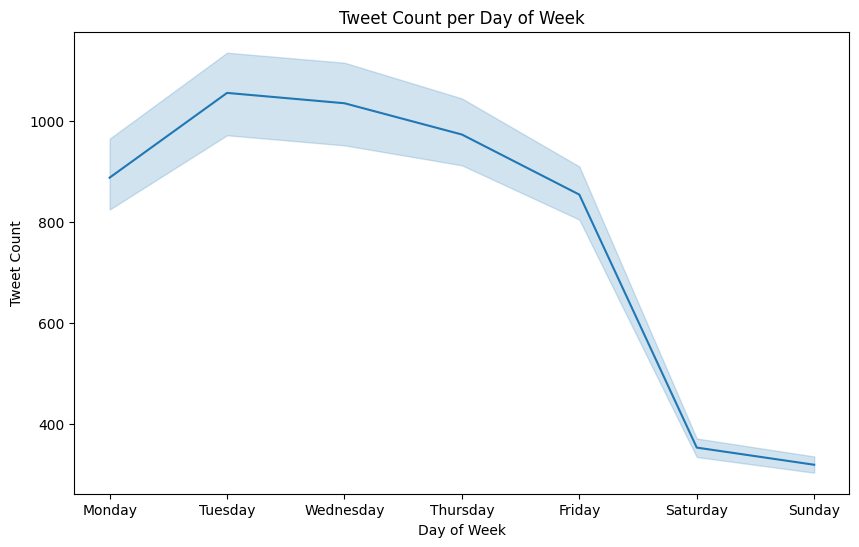

In [23]:
day_of_week = df['date'].dt.dayofweek
month = df['date'].dt.month
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.lineplot(x=day_of_week, y=sublist_count)
plt.xlabel('Day of Week')
plt.ylabel('Tweet Count')
plt.title('Tweet Count per Day of Week')
plt.xticks(ticks=range(7), labels=day_labels)
plt.show()

The graph shows the number of tweets per day of the week. The number of tweets is highest on Tuesday and Wednesday and decreases steadily through the week until it reaches its lowest point on Sunday. Saturday and Sunday has very less number of tweets posted related to Apple because trading of stock does not happen on those days. And again by Monday it increases.

***Box Plot of Stock Prices***

<Figure size 1000x700 with 0 Axes>

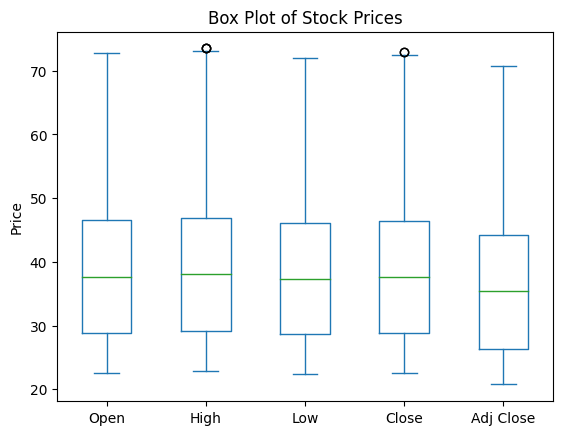

In [24]:
plt.figure(figsize=(10, 7))
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')
plt.title('Box Plot of Stock Prices')
plt.ylabel('Price')
plt.show()

From this boxplot, there are only two outliers visible from High and Close. However we cannot conclude it as an outlier because it is not very far from the whiskers. This distribution of stock prices is right skewed and the median lies between 30 and 40. Based on the box plot, we can see that the stock price has a range of approximately 20 to 75.

***Correlation Heatmap***

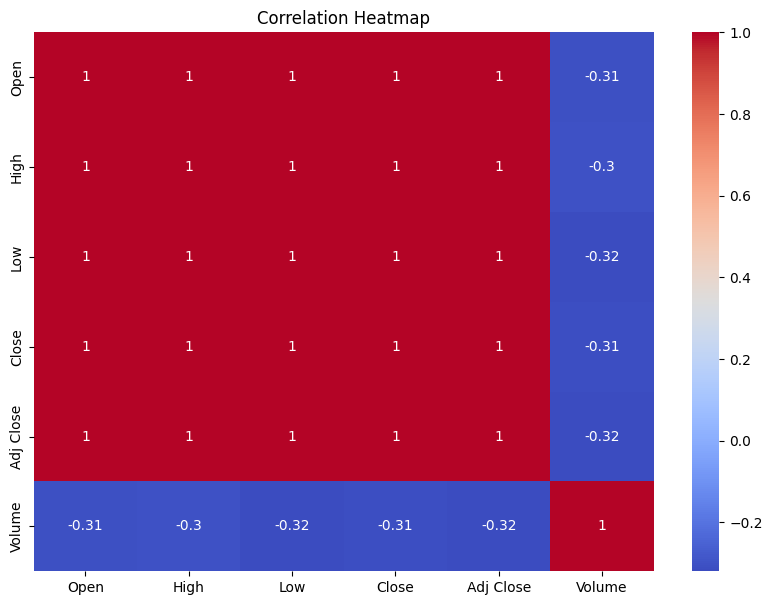

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This correlation heatmap shows that  all the metrics are highly correlated with each other, except for Volume which is negatively correlated with the other metrics. The correlation between Open, High, Low, Close, and Adjusted Close is 1, indicating a perfect positive correlation. This suggests that these metrics are strongly related and move in the same direction. The negative correlation between Volume and the other metrics suggests that when the stock price is going up, the trading volume is generally decreasing, and vice versa.

***Number of Tweets Per Week Plot***

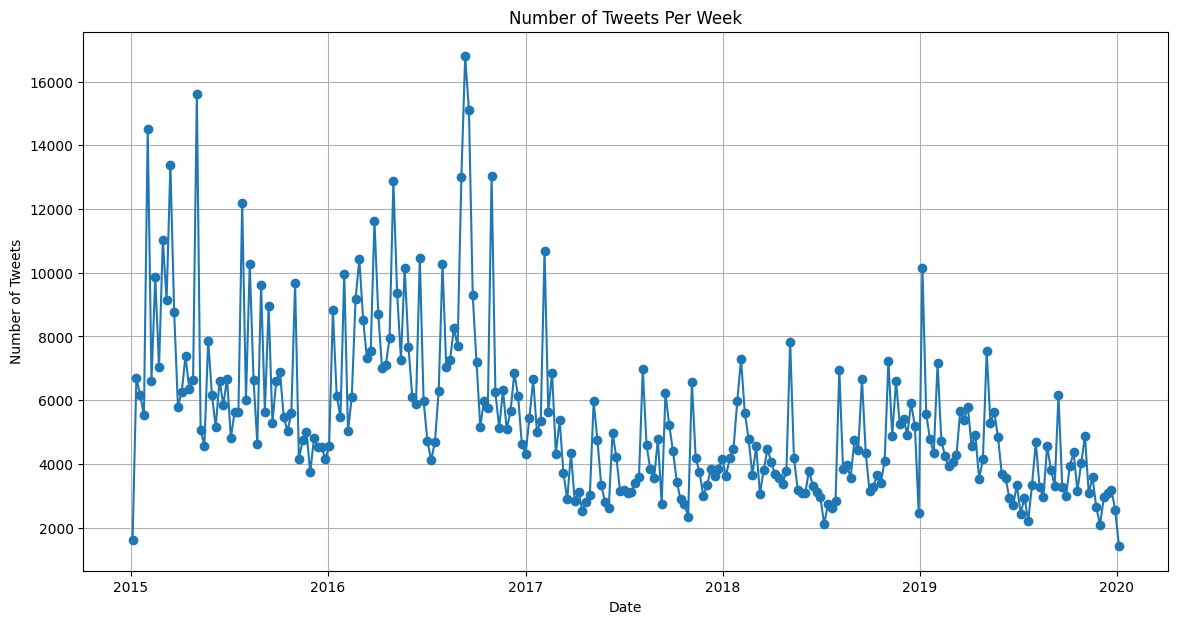

In [26]:
weekly_tweet_counts = df.groupby(pd.Grouper(key='date', freq='W'))['tweet_list'].apply(lambda x: x.str.len().sum())

plt.figure(figsize=(14, 7))
plt.plot(weekly_tweet_counts.index, weekly_tweet_counts, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets Per Week')
plt.grid(True)
plt.show()

The graph shows the number of tweets per week from 2015 to 2020. There are peaks in 2015, 2016, 2017, and 2019. The peak in 2016 is the highest, followed by the peak in 2015. The main conclusion we can reach from this chart is that the number of tweets has decreased after 2017.

***Stock Prices Over Time***

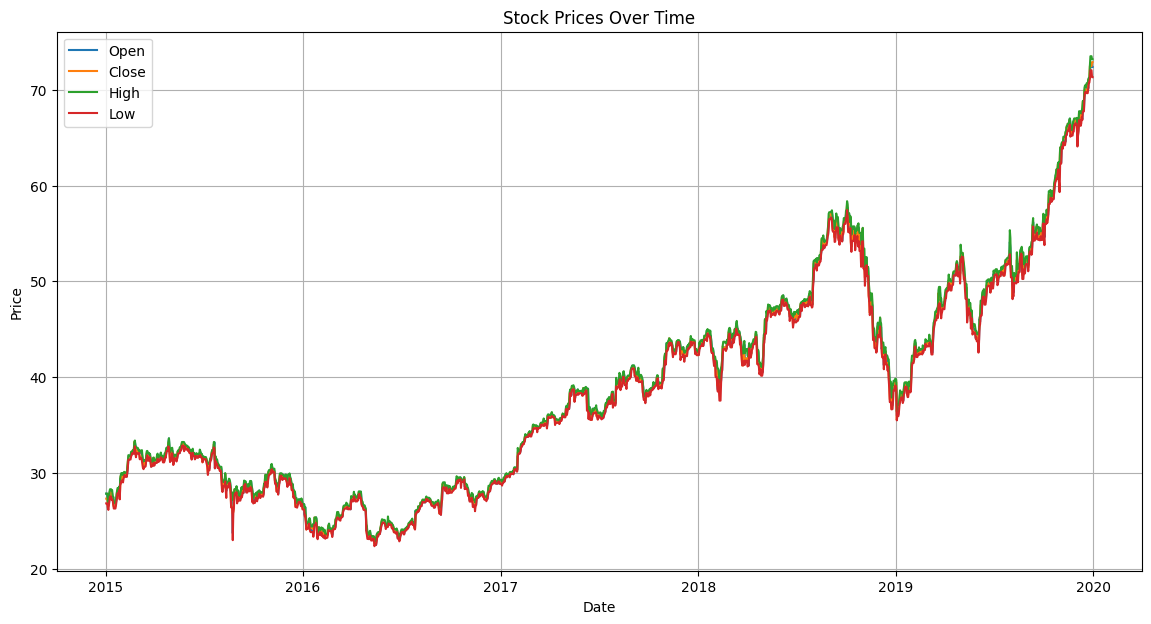

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['Open'], label='Open')
plt.plot(df['date'], df['Close'], label='Close')
plt.plot(df['date'], df['High'], label='High')
plt.plot(df['date'], df['Low'], label='Low')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

This line graph illustrates the stock prices of a particular asset over a five-year period, spanning from 2015 to 2020. The graph showcases four distinct lines, each representing different aspects of stock prices: Open (depicted in blue), Close (orange), High (green), and Low (red). The x-axis signifies the timeline, progressing from 2015 to 2020, while the y-axis represents the stock price, ranging from 20 to 70 units. Initially, until approximately mid-2018, the stock prices demonstrate a period of relative stability across all four categories. And there is a drastic drop in the stock prices. However, following this period, there is a discernible and significant upward trend in all aspects of stock prices. By late 2020, there is a noticeable spike in stock prices across the board.

***Volume vs. Stock Prices Plot***

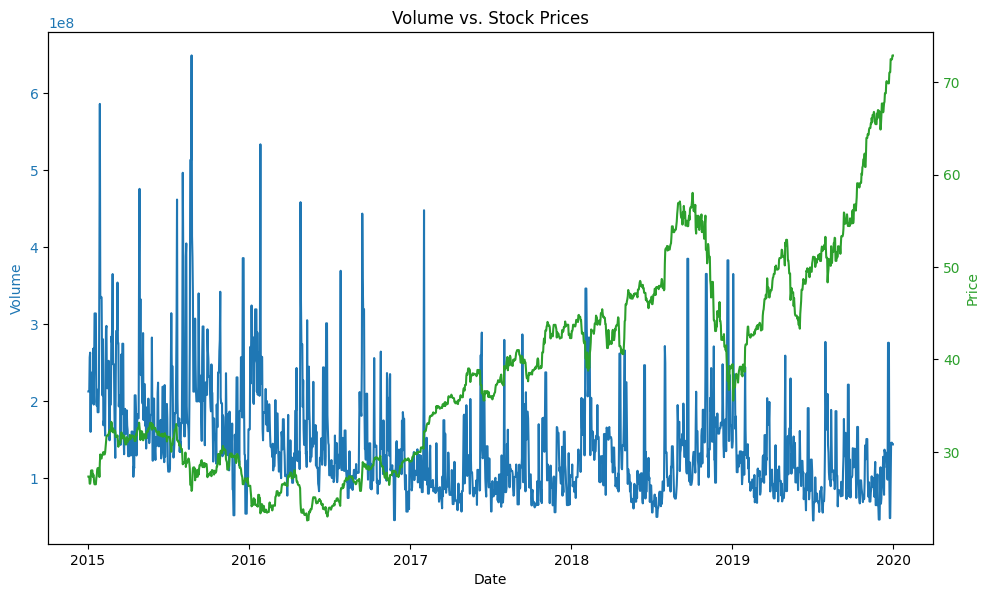

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='tab:blue')
ax1.plot(df['date'], df['Volume'], color='tab:blue', label='Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Price', color='tab:green')
ax2.plot(df['date'], df['Close'], color='tab:green', label='Close Price')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Volume vs. Stock Prices')
plt.show()

The chart shows the volume and stock price of a company from 2015 to 2020. The volume is represented by the blue bars and the price is represented by the green line. The price is on the right y-axis and the volume is on the left y-axis. It can be observed that the price increased significantly from 2015 to 2020, while the volume fluctuated greatly with a decreasing trend. There are several instances where the stock price peaked, while the volume dropped and when price dropped, the volume peaked. This appears to be a negative correlation between volume and stock price.

***Daily Returns Over Time Plot***

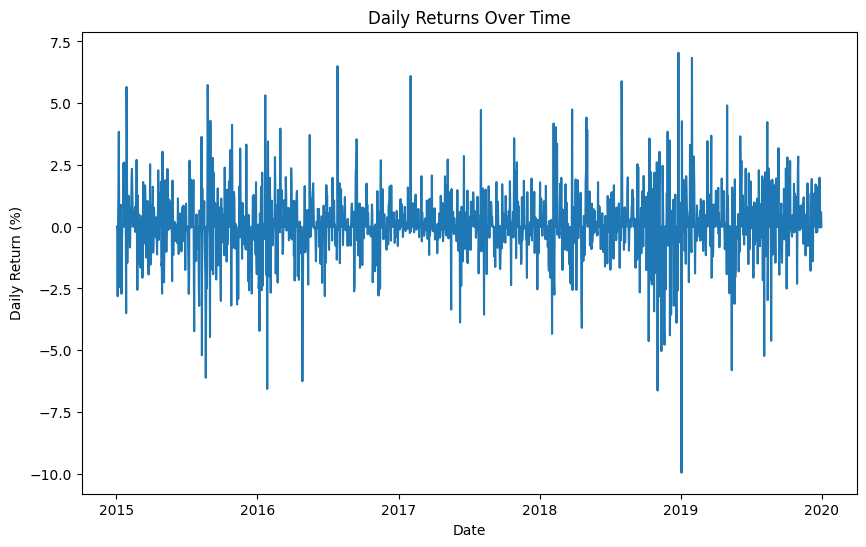

In [29]:
df['Daily Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Daily Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Returns Over Time')
plt.show()

The plot shows the daily returns of an asset over time from 2015 to 2020. The returns fluctuate significantly, with some days experiencing large gains and others experiencing large losses. The largest daily gain appears to be around 7%, while the largest daily loss is around -10%. The returns appear to be relatively volatile, with a lot of ups and downs.

Understanding the historical trends and patterns of stock prices through visualizations like this graph is crucial during the data exploration phase. It offers valuable insights into the behavior and performance of the asset over the specified time frame.

# Preprocessing

At the preprocessing stage of our dataset, we removed URLs, emojis, mentions, html tags, converted abbreviations, lowercase the text, tokenized the text, removed punctuations, removed stopwords, lemmatized the tokens and normalized whitespace. 

We did not remove hashtags here instead removed the ‘#’ sign. Because they provide valuable context that can enhance the understanding of the tweet's content and its relevance, hashtags shouldn't be removed. Hashtags often indicate trending topics or events. By keeping hashtags, we can identify which subjects are popular at a given time and can amplify the sentiment of a tweet. For example, #love or #hate can significantly impact the perceived sentiment of the tweet.


In [30]:
removed_items = {
    "html_tags": [],
    "urls": [],
    "emojis": [],
    "mentions": [],
    "stopwords": [],
    "abbreviations": []
}

***Removing URLs***

In [31]:
#function to remove URLs
def remove_URL(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    urls = url_pattern.findall(text)
    removed_items["urls"].extend(urls)
    return url_pattern.sub(r'', text)

def remove_URLs_from_list(tweet_list):
    return [remove_URL(tweet) for tweet in tweet_list]

df['tweet_list'] = df['tweet_list'].apply(lambda x: remove_URLs_from_list(x) if isinstance(x, list) else x)

In the data preprocessing stage, we focused on cleaning the textual data by removing URLs from the tweets. We defined a function, `remove_URL`, which uses a regular expression to identify and remove URLs from the text, appending the found URLs to a dictionary for record-keeping and replacing them with an empty string. We then created a helper function, `remove_URLs_from_list`, to apply the `remove_URL` function to each tweet in a list. This helper function was applied to the 'tweet_list' column of our DataFrame, ensuring every tweet was processed to remove URLs. 

We remove URLs during text preprocessing to reduce noise and maintain consistency in the text data. URLs are not part of natural language and can distract NLP models from meaningful content.

In [32]:
url_counts = Counter(removed_items["urls"])
most_common_urls = url_counts.most_common(10)
print("Top 10 Most Common URLs:")
for url, count in most_common_urls:
    print(f"{url}: {count}")

Top 10 Most Common URLs:
http://investwall.com: 13626
http://comparespreadbetting.com/compare?name=US%20Tech%20Giants…: 5981
http://valuewalk.com: 4807
http://rbn.cm/VbMIHH: 3175
http://cityfalcon.com/watchlists?name=US%20Tech%20Giants…: 3003
http://cityfalcon.com/watchlists?assets=AAPL,%20DB,%20BP…: 2810
http://cityfalcon.com/watchlists?assets=aapl,%20tsla…: 2789
http://cityfalcon.com/watchlists?assets=oil,%20aapl,%20eurusd…: 2642
http://marketparse.com: 2584
http://cloudunlock.com: 2410


This indicates the ten most frequently mentioned URLs in tweets related to Apple Inc. Among these, "http://investwall.com" is the most common, appearing 13,626 times. Several URLs from "http://cityfalcon.com" also appear frequently, indicating significant engagement with their watchlists focusing on assets like AAPL. Other notable mentions suggests that these sites are prominent sources of information or discussion points within the Apple-related Twitter community. This data highlights the influence and reach of specific financial and market analysis websites in conversations about Apple Inc. on Twitter.

***Removing Emojis***

In [33]:
def remove_emoji(text):
    emojis = [char for char in text if char in emoji.EMOJI_DATA]
    removed_items["emojis"].extend(emojis)
    return emoji.replace_emoji(text, replace='')

def remove_emojis_from_list(tweet_list):
    return [remove_emoji(tweet) for tweet in tweet_list]

df['tweet_list'] = df['tweet_list'].apply(lambda x: remove_emojis_from_list(x) if isinstance(x, list) else x)

Next, we  focused on removing emojis from the tweets to clean the textual data. We defined a function, remove_emoji, which identifies emojis in the text, appends them to a dictionary for record-keeping, and replaces them with an empty string. A helper function, remove_emojis_from_list, was then created to apply remove_emoji to each tweet in a list. This helper function was applied to the 'tweet_list' column of our DataFrame, ensuring every tweet was processed to remove emojis. 

Emojis are often removed during text preprocessing in NLP to maintain consistency and reduce noise. They don’t contribute to the semantic meaning of the text and can interfere with downstream tasks.


In [34]:
emoji_counts = Counter(removed_items["emojis"])
most_common_emoji = emoji_counts.most_common(10)
print("Top 10 Most Common Emojis:")
for emoji, count in most_common_emoji:
    print(f"{emoji}: {count}")

Top 10 Most Common Emojis:
▶: 3627
®: 143
™: 141
©: 45
✔: 25
↗: 10
↘: 1
⤵: 1
⤴: 1
♟: 1


From the above code we received the top 10 most common emojis and symbols, including icons like '▶', '®', '™', '©', '✔', '↗', '↘', '⤵', '⤴', and '♟'. Among these, the "▶" symbol is the most prevalent, appearing 3,627 times, followed by "®" with 143 mentions and "™" with 141 mentions. Other symbols like "©", "✔", and various directional arrows ("↗", "↘", "⤵", "⤴") also appear, with lower frequencies. The presence of these symbols suggests that tweets related to Apple Inc. often contain visual elements, such as icons or directional indicators, possibly indicating the multimedia nature of the content shared or referenced in these tweets.

***Removing Mentions***

In [35]:
def remove_mentions(text):
    mention_pattern = re.compile(r'@\w+')
    mentions = mention_pattern.findall(text)
    removed_items["mentions"].extend(mentions)
    return mention_pattern.sub(r'', text)

def remove_mentions_from_list(tweet_list):
    return [remove_mentions(tweet) for tweet in tweet_list]

df['tweet_list'] = df['tweet_list'].apply(lambda x: remove_mentions_from_list(x) if isinstance(x, list) else x)

In the data preprocessing stage, we also removed mentions from the tweets to further clean the textual data. We defined a function, `remove_mentions`, which uses a regular expression to find and remove all mentions (text starting with '@') from the tweet, and stores the removed mentions in a dictionary for record-keeping. A helper function, `remove_mentions_from_list`, applies `remove_mentions` to each tweet in a list. This helper function was then applied to the 'tweet_list' column of our DataFrame, ensuring every tweet was processed to remove mentions. These steps were taken to ensure the text was cleaner and more suitable for subsequent analysis.
Mentions (such as Twitter handles or usernames) are removed during text preprocessing to ensure that they don’t interfere with downstream tasks. They are typically not relevant to the semantic content of the text. 


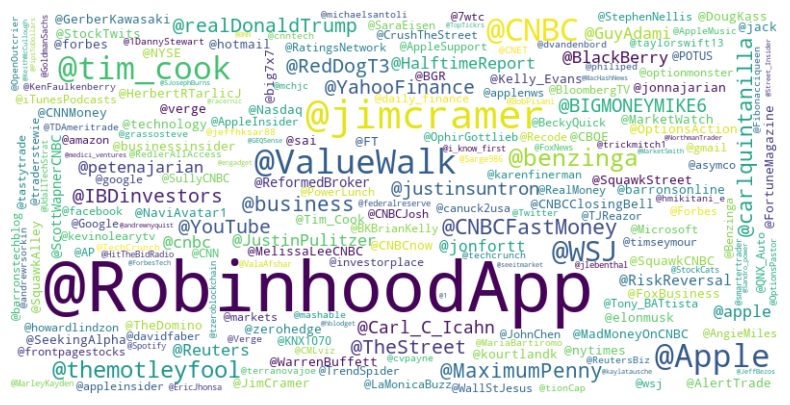

In [36]:
mentions_counts = Counter(removed_items["mentions"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(mentions_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud represents the most mentioned accounts on Twitter for the posts related to Apple Inc. Mostly mentioned account is @RobinhoodApp which is a retail investment platform sugesting that the tweets have an involvement of individual investors in the stock market. It highlights prominent individuals and organizations involved in financial news and commentary, particularly those covering the technology sector.  The is also a large presence of @CNBC, @Apple, and @Tim_Cook signifies their importance in the discourse surrounding Apple. The inclusion of financial personalities like @JimCramer and @WarrenBuffett emphasizes the significant attention given to Apple's stock performance and financial news.  Additionally, the presence of other technology companies and financial platforms like @YahooFinance and @IBDinvestors indicates a broader interest in the technology sector and its connection to the stock market.  


***Removing HTML Tags***

In [37]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    for tag in soup.find_all(True):
        removed_items["html_tags"].append(tag.name)
    return soup.get_text()

def remove_html_from_list(tweet_list):
    return [remove_html(tweet) for tweet in tweet_list]

df['tweet_list'] = df['tweet_list'].apply(lambda x: remove_html_from_list(x) if isinstance(x, list) else x)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7912\192709725.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In this step, we define a function remove_html to strip HTML tags from text using BeautifulSoup, ensuring any HTML content is removed from the tweets. The function also tracks the removed HTML tags by appending them to the removed_items dictionary. We then create a helper function, remove_html_from_list, which applies remove_html to each tweet in a list. This helper function is applied to the 'tweet_list' column of our DataFrame, ensuring that all tweets are processed to remove HTML content. This step is crucial for cleaning the text data, making it more suitable for subsequent text analysis and free from web structural elements.


***Converting Abbreviations***

In [38]:
#function to convert abbreviations
def convert_abbreviations(text):
    abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life redata",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "redata",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "data me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
    }
    
    found_abbr = []
    for abbr, full in abbreviations.items():
        if abbr in text:
            found_abbr.append(abbr)
            text = text.replace(abbr, full)
    removed_items["abbreviations"].extend(found_abbr)
    return text

def convert_abbreviations_in_list(tweet_list):
    return [convert_abbreviations(tweet) for tweet in tweet_list]

df['tweet_list'] = df['tweet_list'].apply(lambda x: convert_abbreviations_in_list(x) if isinstance(x, list) else x)

We define the function `convert_abbreviations` to replace common abbreviations with their full forms, enhancing the readability of the text. The function iterates through a dictionary containing abbreviations and their corresponding expansions, replacing each abbreviation found in the text with its full form. The function also records the abbreviations that were replaced in the `removed_items` dictionary. We then create a helper function, `convert_abbreviations_in_list`, which applies `convert_abbreviations` to each tweet in a list. This helper function is then applied to the 'tweet_list' column of our DataFrame to convert abbreviations in the text data. This step improves the interpretability of the tweets and ensures consistency in the language used, aiding subsequent text analysis tasks.


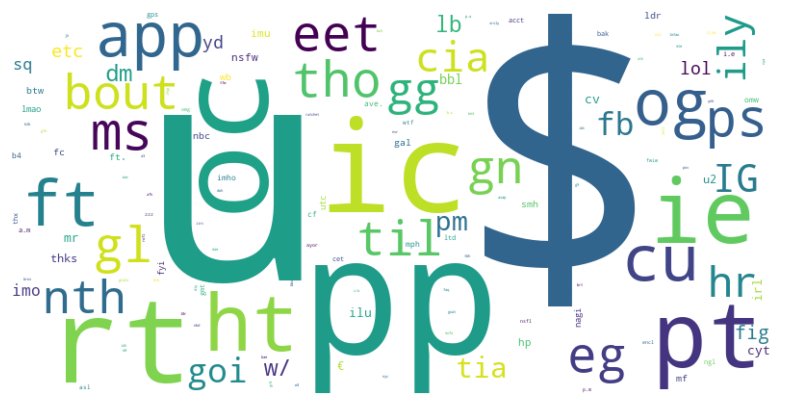

In [39]:
abbreviations_counts = Counter(removed_items["abbreviations"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(abbreviations_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud shows some of the abbreviations that have been converted to their full format are $ representing dollar, pp representing pages. These abbreviations which have no meaning used in tweets and in social media context have been converted to meaningful words.

***Lowercasing***

In [40]:
df['tweet_list'] = df['tweet_list'].apply(lambda x: [tweet.lower() for tweet in x])

This lowercasing step helps to normalize the text by ensuring that different variations of the same word are treated as identical. Lowercasing ensures consistency in the text data, making it easier to compare and analyze. It avoids potential discrepancies that might arise from mixed-case words.

In [41]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416


***Tokenization of Text***

In [42]:
df['tokenized_tweet_list'] = df['tweet_list'].apply(lambda x: [word_tokenize(tweet.lower()) for tweet in x])

In [43]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, a, winnah, ., rt, :..."
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, :, on, thin, ice, ”, is, this, we..."
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, in, 1977, -, apagesle, compyouter, is..."
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, !, !, pi, see..."
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[#, toptickertweets, dollar, spy, dollar, imr..."


We applied tokenization to the tweets by creating a new column, `tokenized_tweet_list`, in our DataFrame. This process involves the use of the `word_tokenize` function from the NLTK library, which splits each tweet into individual words (tokens). Specifically, we converted each tweet to lowercase to ensure consistency and then tokenized the text. This step is crucial for text analysis as it breaks down the text into manageable pieces, facilitating further processing such as removing stop words and lemmatization. Tokenization is a foundational step in natural language processing, enabling more detailed and structured examination of the textual data.


***Removing Punctuations***

In [44]:
punctuation_set = set(string.punctuation)

def remove_punctuation(tokens):
    return [token for token in tokens if token not in punctuation_set]

df['tokenized_tweet_list'] = df['tokenized_tweet_list'].apply(lambda x: [remove_punctuation(tokens) for tokens in x])

We removed punctuation from the tokenized tweet lists by defining a function called `remove_punctuation`, which filters out tokens containing punctuation characters. This function was applied to each sublist of tokens within the 'tokenized_tweet_list' column using a list comprehension. By iterating over each sublist, we removed any tokens that were found in the set of punctuation characters obtained from the string module. This step ensures that punctuation marks do not interfere with subsequent text analysis tasks, such as sentiment analysis or topic modeling, by eliminating unnecessary noise from the tokenized text data.


In [45]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, a, winnah, rt, if, ..."
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, on, thin, ice, ”, is, this, week,..."
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, in, 1977, apagesle, compyouter, is, i..."
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, pi, seek, dol..."
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[toptickertweets, dollar, spy, dollar, imrs, ..."


***Removing Stopwords***

In [46]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    removed_stopwords = [token for token in tokens if token in stop_words]
    removed_items["stopwords"].extend(removed_stopwords)  # Add removed stopwords to the list
    return [token for token in tokens if token not in stop_words and token not in punctuation_set]

df['tokenized_tweet_list'] = df['tokenized_tweet_list'].apply(lambda x: [remove_stopwords(tokens) for tokens in x])

By removing stop words some common words which do not add much information. By removing them we can simplify the text and reduce the number of tokens which helps in increasing the speed in doing analysis and also helps in concentrating on the content. With the above steps, we have conducted on removing stop words.

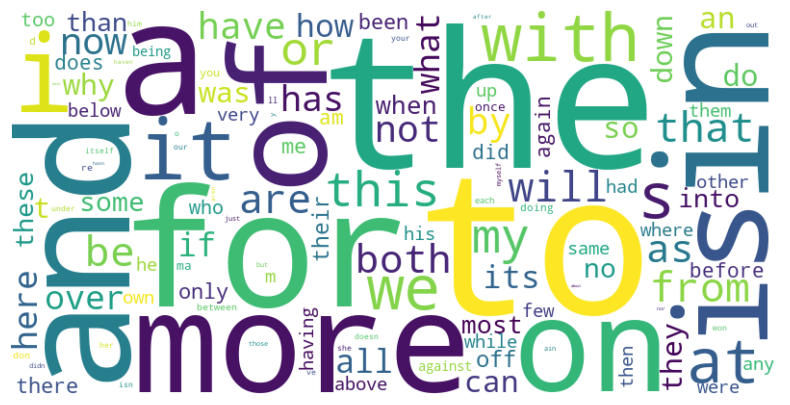

In [47]:
stopwords_counts = Counter(removed_items["stopwords"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(stopwords_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows some of the stopwords that have been removed from the tweets. Some of the words are 'a', 'to', 'for', 'the', 'and' which are words that do not give a specific meaning and which does not add information.

***Lemmatization***

With Lemmatization we are able to reduce the tokens to their base form or the root form they are of. Doing lemmatization is important in our dataset to ensure that different variations of the words are mapped to the base form they are of by standardizing the text. Together with that, lemmatization helps in providing more meaningful representation for sentiment analysis in which we are to conduct. We have followed the steps for lemmatization as below.

In [48]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['tokenized_tweet_list'] = df['tokenized_tweet_list'].apply(lambda x: [lemmatize_tokens(tokens) for tokens in x])

In [49]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, winnah, rt, dollar,..."
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, thin, ice, ”, week, ’, free, apag..."
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, 1977, apagesle, compyouter, incorpora..."
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, pi, seek, dol..."
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[toptickertweets, dollar, spy, dollar, imrs, ..."


***Whitespace Normalization***

With the function to remove whitespace, the resulting data after normalizing whitespace will have clean and consistent whitespace useful for further analysis by helping to standardize the text. We have followed the steps to normalize whitespace as below.


In [50]:
def normalize_whitespace(tokens):
    return [' '.join(tokens).split() for tokens in tokens]

df['tokenized_tweet_list'] = df['tokenized_tweet_list'].apply(normalize_whitespace)

In [51]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, winnah, rt, dollar,..."
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, thin, ice, ”, week, ’, free, apag..."
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, 1977, apagesle, compyouter, incorpora..."
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, pi, seek, dol..."
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[toptickertweets, dollar, spy, dollar, imrs, ..."


***Most Frequent Words After Preprocessing Text***

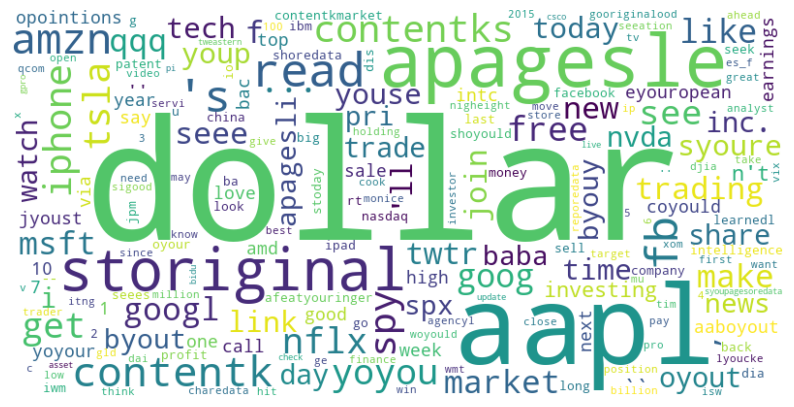

In [52]:
flattened_tokens = [str(token) for sublist in df['tokenized_tweet_list'] for token_list in sublist for token in token_list]
word_counts = Counter(flattened_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud shows the most frequent words in tweets related to Apple. The word ‘dollar’ appears bigger suggesting the discussions on financial aspects such as stock price and market value. The word ‘aapl’ is represented bigger again showing discussions of the Apple stock.The words ‘google’, ‘tsla’, ‘msft’ are companies which are likely to be compared with Apple. Based on the word cloud mainly we can come to a conclusion that the tweets are mostly discussing trading and finance.

***Bi-Gram Plot***

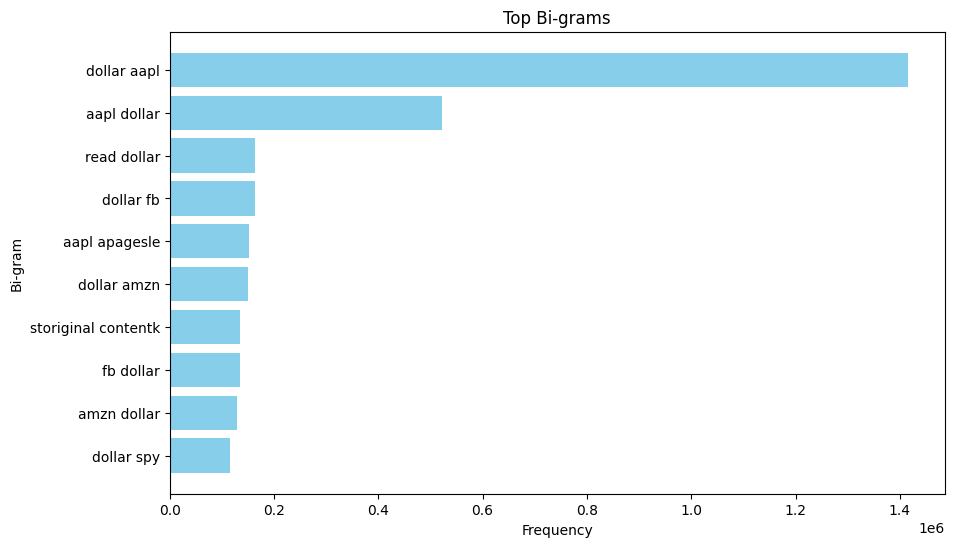

In [53]:
bi_grams = list(ngrams(flattened_tokens, 2))
bi_gram_counts = Counter(bi_grams)
top_n = 10  
top_bi_grams = bi_gram_counts.most_common(top_n)

bi_gram_labels = [' '.join(bi_gram[0]) for bi_gram in top_bi_grams]
bi_gram_counts = [bi_gram[1] for bi_gram in top_bi_grams]

plt.figure(figsize=(10, 6))
plt.barh(bi_gram_labels, bi_gram_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title('Top Bi-grams')
plt.gca().invert_yaxis() 
plt.show()

For the above graph of Top Bi-grams related to Apple tweets which shows a sequence of two adjacent words, the top most bi-grams are ‘dollar aapl’ and ‘aapl dollar’ which suggests the stock price of Apple and its relationship in financial terms. Also bi-grams such as ‘dollar fb’, ‘dollar amzn’ shows the comparison of Apple stock price with the other companies. Based on the bi-grams we can get an understanding on mainly what the discussions are about.

***Tri-Gram Plot***

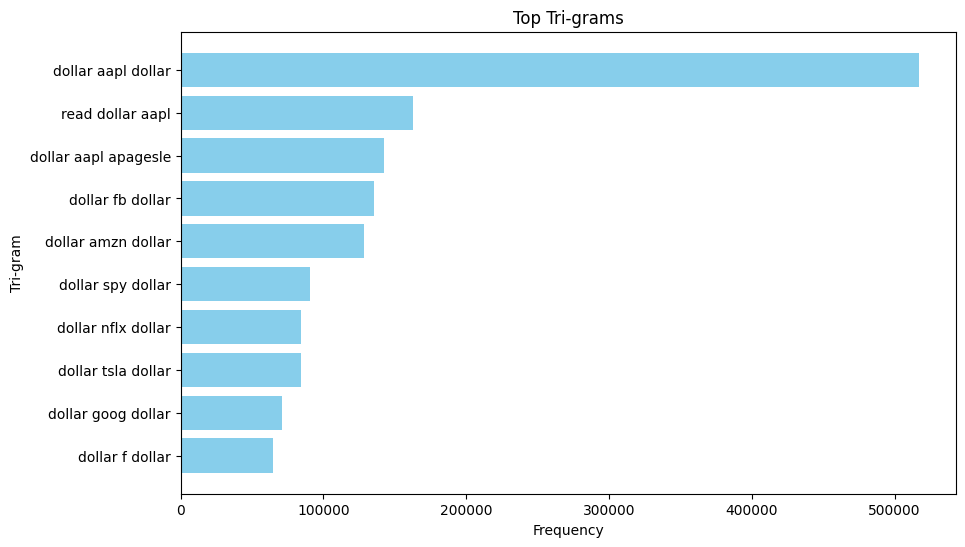

In [54]:
tri_grams = list(ngrams(flattened_tokens, 3))
tri_gram_counts = Counter(tri_grams)
top_n = 10  
top_tri_grams = tri_gram_counts.most_common(top_n)

tri_gram_labels = [' '.join(tri_gram[0]) for tri_gram in top_tri_grams]
tri_gram_counts = [tri_gram[1] for tri_gram in top_tri_grams]

plt.figure(figsize=(10, 6))
plt.barh(tri_gram_labels, tri_gram_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tri-gram')
plt.title('Top Tri-grams')
plt.gca().invert_yaxis() 
plt.show()

For the above graph of Top Tri-grams related to Apple tweets which shows a sequence of three adjacent words, the top most trigrams are ‘dollar aapl dollar’, ‘read dollar aapl’ mainly suggesting about Apple’s stock price whereas the repetition of dollar shows it’s importance together with discussions of financial news related to Apple. Market comparisons also can be seen by comparing with fb, amzn, nflx, tsla, goog using the trigram.

# Sentiment Analysis

***Pre-Trained Sentiment Analysis Models***

In [55]:
sia = SentimentIntensityAnalyzer()

# calculation of sentiment scores for each tweet
def calculate_sentiment(tweet_list):
    sentiment_scores = []
    for tweet_tokens in tweet_list:
        tweet_text = ' '.join(tweet_tokens)
        sentiment = sia.polarity_scores(tweet_text)
        sentiment_scores.append(sentiment['compound'])
    return sentiment_scores

df['sentiment_scores'] = df['tokenized_tweet_list'].apply(calculate_sentiment)

def classify_sentiment(score):
    if score > 0.005:
        return 'Positive'
    elif score < -0.005:
        return 'Negative'
    else:
        return 'Neutral'

# classify each sentiment score in the list
def classify_sentiment_list(sentiment_scores):
    return [classify_sentiment(score) for score in sentiment_scores]

df['classified_sentiments'] = df['sentiment_scores'].apply(classify_sentiment_list)

# count occurrences of each sentiment label
def count_sentiments(classified_list):
    positive_count = classified_list.count('Positive')
    negative_count = classified_list.count('Negative')
    neutral_count = classified_list.count('Neutral')
    return positive_count, negative_count, neutral_count

df['positive_count'], df['negative_count'], df['neutral_count'] = zip(*df['classified_sentiments'].apply(count_sentiments))

df['positive_sentiment'] = df.apply(lambda row: row['sentiment_scores'][row['classified_sentiments'].index('Positive')]
                                    if 'Positive' in row['classified_sentiments'] else None, axis=1)
df['negative_sentiment'] = df.apply(lambda row: row['sentiment_scores'][row['classified_sentiments'].index('Negative')] 
                                    if 'Negative' in row['classified_sentiments'] else None, axis=1)
df['neutral_sentiment'] = df.apply(lambda row: row['sentiment_scores'][row['classified_sentiments'].index('Neutral')] 
                                   if 'Neutral' in row['classified_sentiments'] else None, axis=1)
df['negative_sentiment'] = df['negative_sentiment'].fillna(0)

print("Positive Sentiment Counts:")
print(df['positive_count'])

print("Negative Sentiment Counts:")
print(df['negative_count'])

print("Neutral Sentiment Counts:")
print(df['neutral_count'])

Positive Sentiment Counts:
1       301
2       185
3       202
4       423
5       495
       ... 
1814    168
1815     84
1816     84
1817    326
1818    282
Name: positive_count, Length: 1818, dtype: int64
Negative Sentiment Counts:
1       123
2        27
3        29
4       168
5       133
       ... 
1814     46
1815     28
1816     22
1817     91
1818     95
Name: negative_count, Length: 1818, dtype: int64
Neutral Sentiment Counts:
1       443
2       134
3       175
4       556
5       562
       ... 
1814    167
1815     98
1816     84
1817    315
1818    306
Name: neutral_count, Length: 1818, dtype: int64


Sentiment analysis was carried out utilizing pre-trained models, proprietary machine learning approaches, and sentiment lexicons. The following actions were taken:

Pre-trained sentiment analysis models served as a starting point. These models have been trained on big datasets and can provide a solid foundation for sentiment analysis.

The output is the outcome of sentiment analysis on an Apple Co.-related dataset using the Python package NLTK's VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment analysis tool.

The output is divided into three sections, each containing dates and numbers for several sentiment categories: Positive Sentiment numbers, Negative Sentiment Counts, and Neutral Sentiment Counts. For example, under Positive Sentiment Counts, the day 2015-01-02 has a count of 301.

This output is interesting because it gives a quantitative study of sentiments over time using categorized sentiment scores derived from textual input (such as tweets). It enables an understanding of how positive, negative, and neutral feelings evolve across different dates in the collection.


In [56]:
# overall sentiment score using weighted average
def calculate_weighted_sentiment(df):
    weighted_sum = (df['positive_count'] * df['positive_sentiment'] +
                    df['negative_count'] * df['negative_sentiment'] +
                    df['neutral_count'] * df['neutral_sentiment'])

    total_count = df['positive_count'] + df['negative_count'] + df['neutral_count']
    overall_sentiment = weighted_sum / total_count

    return overall_sentiment

df['overall_sentiment'] = calculate_weighted_sentiment(df)

print(df['overall_sentiment'])

1       0.189010
2       0.248178
3       0.204700
4       0.223881
5       0.147294
          ...   
1814    0.045459
1815    0.207533
1816    0.050069
1817    0.214826
1818    0.215675
Name: overall_sentiment, Length: 1818, dtype: float64


The overal_sentiment is calculated by taking a weighted average of the positive, negative, and neutral sentiment scores for each date.
For example, on January 2, 2015, the total sentiment score was 0.189010, reflecting a slightly positive feeling. 
These overall sentiment ratings provide a single metric that encapsulates the sentiment of the textual data on each day. This is valuable for analyzing sentiment changes over time and finding trends or major events that may have influenced public opinion.

It is vital to remember that sentiment analysis is a hard undertaking, and the results should be evaluated with caution. Sentiment ratings derived from textual data offer a helpful but simplified depiction of public opinion. They do not capture the whole range of human emotions and perspectives.



In [57]:
def classify_sentiment_label(score):
    if score > 0.005:
        return 'Positive'
    elif score < -0.005:
        return 'Negative'
    else:
        return 'Neutral'

# sentiment classification to the overall sentiment column
df['sentiment_label'] = df['overall_sentiment'].apply(classify_sentiment_label)

print(df['sentiment_label'])

sentiment_counts = df['sentiment_label'].value_counts()

print("Sentiment Counts:")
print(sentiment_counts)

1       Positive
2       Positive
3       Positive
4       Positive
5       Positive
          ...   
1814    Positive
1815    Positive
1816    Positive
1817    Positive
1818    Positive
Name: sentiment_label, Length: 1818, dtype: object
Sentiment Counts:
sentiment_label
Positive    1701
Negative      83
Neutral       34
Name: count, dtype: int64


We then classified the overall sentiment for each date in your dataset as 'Positive', 'Negative', or 'Neutral' using the 'overall_sentiment' score (weighted average score). For example, on January 2nd, 2015, the overall sentiment was rated as 'Positive'. 

It displays the counts for each sentiment label in the dataset. There are 1701 instances labeled 'Positive', 83 'Negative' and 36 'Neutral'.

These sentiment labels and counts provide a summary of the sentiment in the textual data for each date. This is valuable for analyzing sentiment changes over time and finding trends or major events that may have influenced public opinion.


In [58]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list,sentiment_scores,classified_sentiments,positive_count,negative_count,neutral_count,positive_sentiment,negative_sentiment,neutral_sentiment,overall_sentiment,sentiment_label
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, winnah, rt, dollar,...","[0.0, 0.6369, 0.0, 0.0, 0.4215, 0.0, -0.2263, ...","[Neutral, Positive, Neutral, Neutral, Positive...",301,123,443,0.6369,-0.2263,0.0,0.189010,Positive
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, thin, ice, ”, week, ’, free, apag...","[0.5106, 0.5106, 0.0, 0.6908, 0.0, 0.0, 0.0, 0...","[Positive, Positive, Neutral, Positive, Neutra...",185,27,134,0.5106,-0.3182,0.0,0.248178,Positive
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, 1977, apagesle, compyouter, incorpora...","[0.0, 0.5106, 0.0, 0.3818, 0.0, 0.7906, 0.5106...","[Neutral, Positive, Neutral, Positive, Neutral...",202,29,175,0.5106,-0.6908,0.0,0.204700,Positive
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, pi, seek, dol...","[0.7964, 0.7964, 0.5859, 0.7964, 0.5106, 0.796...","[Positive, Positive, Positive, Positive, Posit...",423,168,556,0.7964,-0.4767,0.0,0.223881,Positive
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[toptickertweets, dollar, spy, dollar, imrs, ...","[0.0, 0.0, 0.0, 0.0, 0.4019, 0.6369, 0.5106, 0...","[Neutral, Neutral, Neutral, Neutral, Positive,...",495,133,562,0.4019,-0.1779,0.0,0.147294,Positive


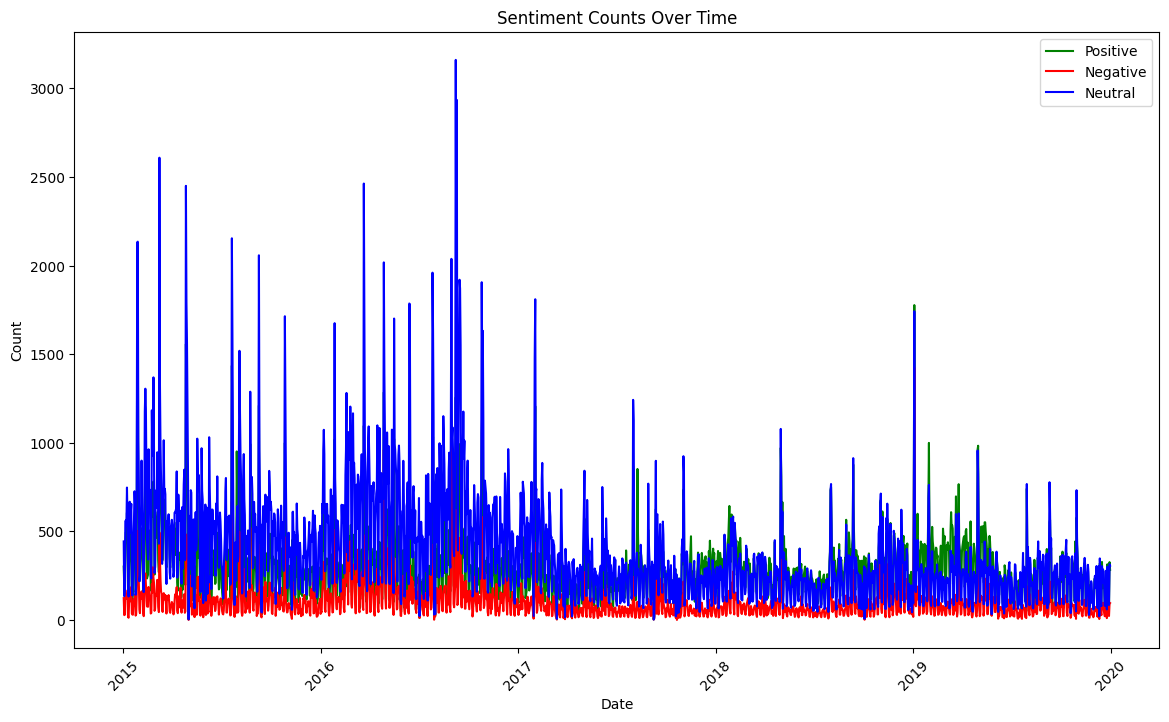

In [101]:
plt.figure(figsize=(14, 8))

plt.plot(df['date'], df['positive_count'], label='Positive', color='green')
plt.plot(df['date'], df['negative_count'], label='Negative', color='red')
plt.plot(df['date'], df['neutral_count'], label='Neutral', color='blue')

plt.title('Sentiment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

plt.show()

The figure is a line graph that depicts sentiment analysis results over time for Apple Co. data. The x-axis indicates the date, which ranges from 2015 to the end of 2019, while the y-axis shows the number of sentiment labels, which ranges from 0 to 3000.
Neutral Sentiment (Blue Line): This line had the largest count throughout the provided time period, showing that the majority of attitudes were neutral. There are multiple peaks, indicating instances when neutral feeling was especially strong.
Positive Sentiment (Green Line): This line varies the least and remains rather stable in comparison to the other two over the specified timeframe. This shows that positive attitudes were less prevalent.
Negative Sentiment (Red Line): This line has fewer and lower peaks than the Positive Sentiment line, showing that negative attitudes are less common. However, there is some variation, indicating that unfavorable attitudes occurred at specific times.


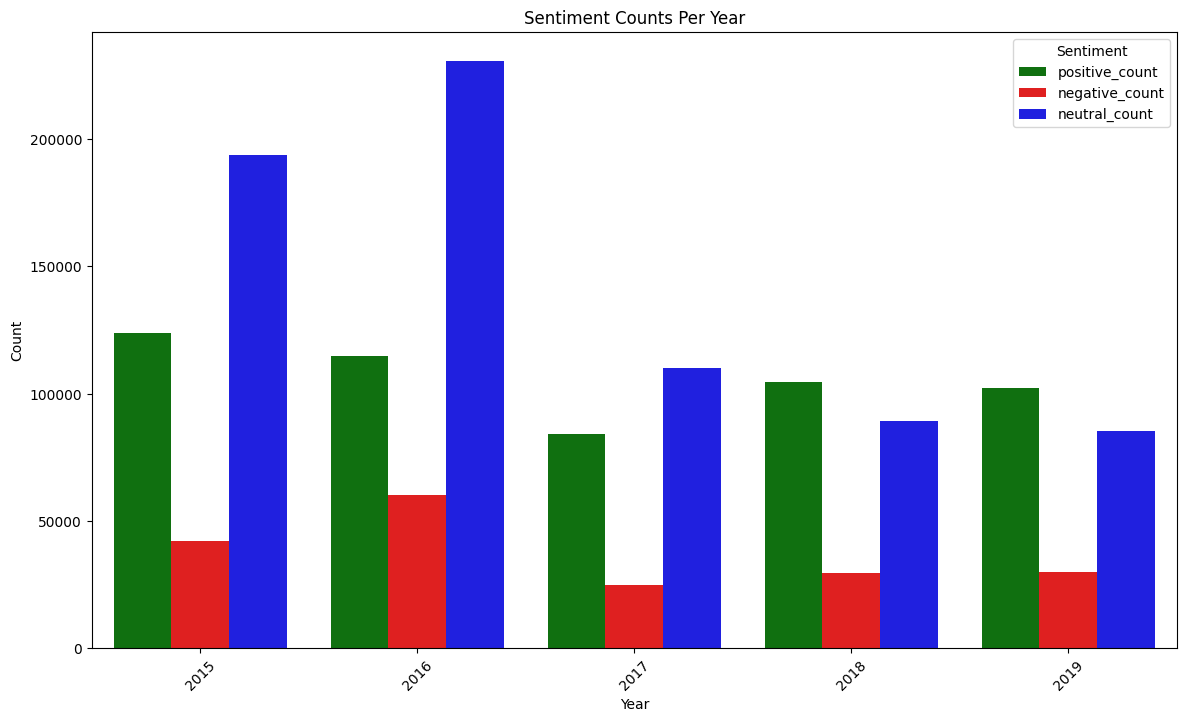

In [102]:
df_yearly = df.groupby(pd.Grouper(key='date', freq='Y')).sum().reset_index()

df_yearly['year'] = df_yearly['date'].dt.year

df_melted_yearly = df_yearly.melt(id_vars='year', value_vars=['positive_count', 'negative_count', 'neutral_count'])

df_melted_yearly.columns = ['Year', 'Sentiment', 'Count']

plt.figure(figsize=(14, 8))

sns.barplot(x='Year', y='Count', hue='Sentiment', data=df_melted_yearly, 
            palette={'positive_count': 'green', 'negative_count': 'red', 'neutral_count': 'blue'})

plt.title('Sentiment Counts Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.legend(title='Sentiment')

plt.show()

The figure is a bar graph that depicts sentiment analysis results over time for Apple Co. data. The x-axis indicates the date, which ranges from 2015 to the end of 2019, while the y-axis shows the number of sentiment labels, which ranges from 0 to 200,000+.

Neutral Sentiment (Blue Bar): This bar had the largest count throughout the provided time period, showing that the majority of attitudes were neutral. There are multiple peaks, indicating instances when neutral feeling was especially strong.

Positive Sentiment (Green Bar): This bar varies the least and remains rather stable in comparison to the other two over the specified timeframe. This shows that positive attitudes were less prevalent.

Negative Sentiment (Red Bar): This bar has fewer and lower peaks than the Positive Sentiment line, showing that negative attitudes are less common. However, there is some variation, indicating that unfavorable attitudes occurred at specific times.


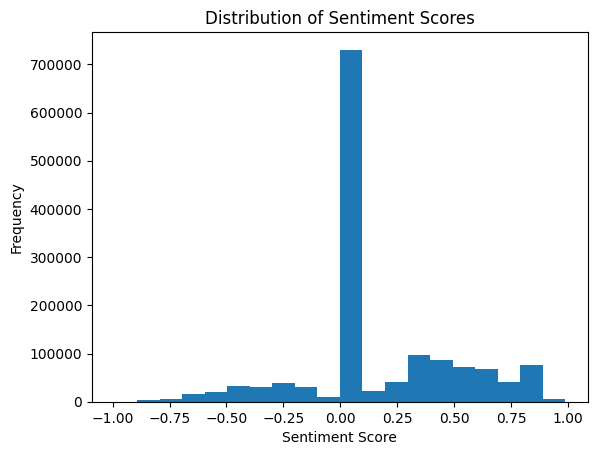

In [61]:
all_sentiments = [score for sublist in df['sentiment_scores'] for score in sublist]
plt.hist(all_sentiments, bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

The figure is a bar chart called "Distribution of Sentiment Scores." It shows the frequency distribution of sentiment scores from -1.00 to 1.00. The x-axis depicts the sentiment score, while the y-axis represents the frequency of these scores.
Neutral Sentiment (Score 0): There is a significant increase in frequency at this score, indicating that a high number of observations have a neutral sentiment score. This indicates that neutral attitudes are considerably more prevalent in this sample than positive or negative ones.
Positive Sentiment (Score > 0): Positive sentiment scores (higher than 0) have lower frequencies than neutral sentiment but are dispersed throughout many scores, showing that the dataset contains a variety of positive attitudes.
Negative Sentiment (Score < 0) has the lowest frequency among all three categories. This shows that negative feelings are the least common in this sample.


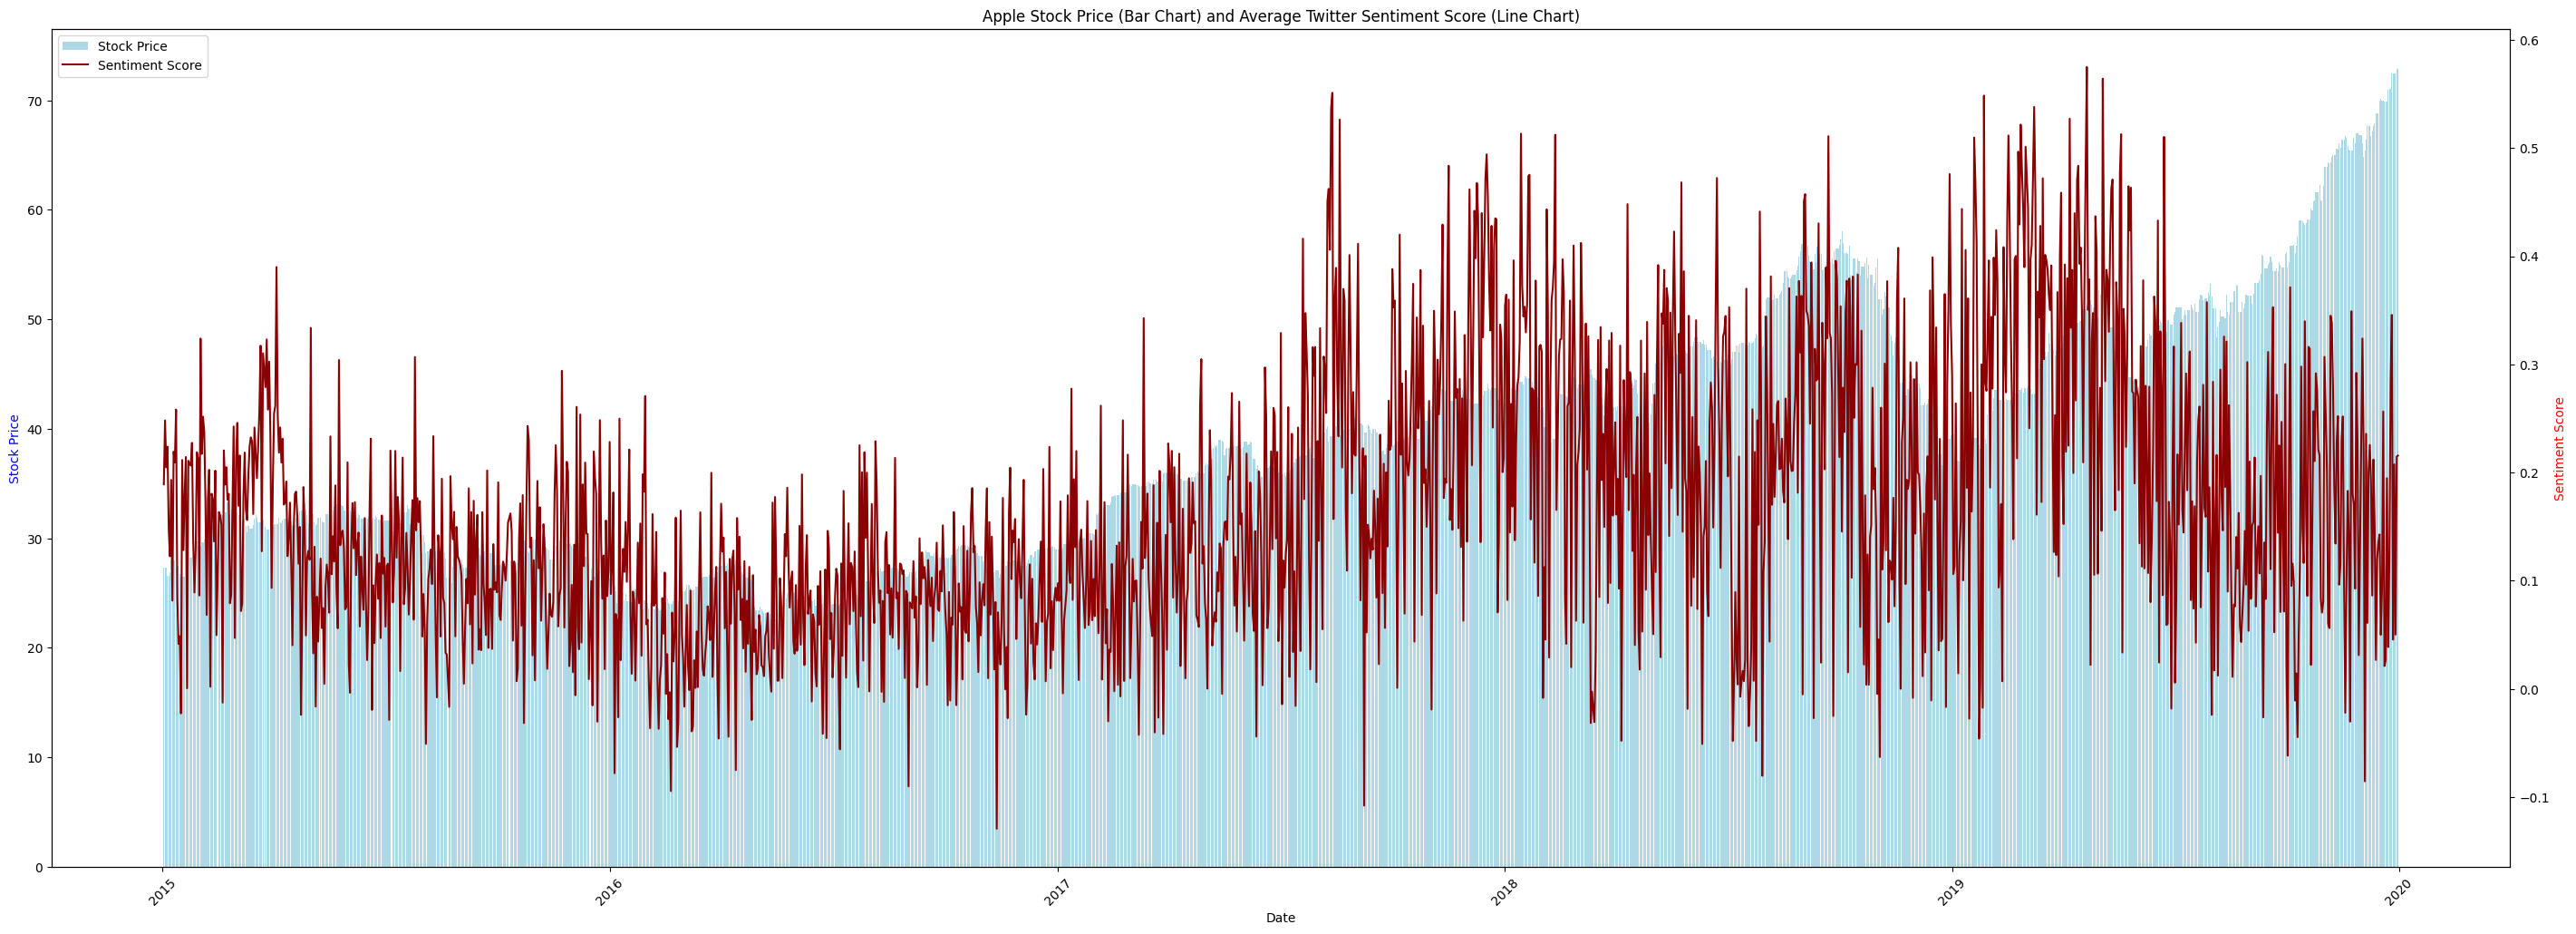

In [62]:
dates = df['date']
stock_prices = df['Close']
sentiment_scores = df['overall_sentiment']

fig, ax1 = plt.subplots(figsize=(35, 12))

ax1.bar(dates, stock_prices, color='lightblue', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(dates, sentiment_scores, color='darkred', label='Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
plt.title('Apple Stock Price (Bar Chart) and Average Twitter Sentiment Score (Line Chart)')
plt.show()

With the above chart which shows the Apple’s stock price and average sentiment score, we can see that the see the relationship of the stock price and the sentiment score. We can see at some pints where the sentiment score is highly positive, the prices has increased which shows that sentiment scores do have an effect of the stock price.

# Creating Custom Sentiment Analysis Models

In [63]:
X = df['tokenized_tweet_list'].apply(lambda tokens: ' '.join(map(str, tokens)))
y = df['sentiment_label']

Data Preparation - As features, we used two columns: 'tokenized_tweet_list' (containing tokenized tweet text) and'sentiment_label' (sentiment labels encoded as Negative (0), Neutral (1), and Positive (2)).
Tokens from each tweet were translated to strings and saved in feature vector X while'sentiment_labels' was stored in feature vector Y.

In [64]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train-Test Split - The data was then separated into two sets training (80%) and test (20%).

In [65]:
# Converting text data into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Feature Extraction - We used TF-IDF (Term Frequency-Inverse Document Frequency) to transform text into numerical characteristics.
TF-IDF weights words according to their frequency in the document and inverse frequency across all documents.

In [66]:
# To overcome class imbalance, oversampling the minority classes using SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

Handling Imbalanced Classes - To overcome class imbalance, we oversampled the minority classes (negative and neutral feelings) with SMOTE.
This balanced the class distribution in the training data.

***Logistic Regression Model***

In [67]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf_res, y_train_res)

# Predictting on test data
y_pred = model.predict(X_test_tfidf)

print("Logistic Regression Model")
print(classification_report(y_test, y_pred))

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.2f}')

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc:.2f}')

Logistic Regression Model
              precision    recall  f1-score   support

    Negative       0.07      0.25      0.11        16
     Neutral       0.04      0.22      0.06         9
    Positive       0.95      0.71      0.81       339

    accuracy                           0.68       364
   macro avg       0.35      0.39      0.33       364
weighted avg       0.89      0.68      0.76       364

Balanced Accuracy: 0.39
Cohen's Kappa: 0.06
Matthews Correlation Coefficient: 0.08


Logistic Regression model - We initially built a Logistic Regression model with balanced class weights. But the model does well in recognizing Positive feelings but suffers with Negative and Neutral sentiments. Upon evaluating the performance of the Logistic Regression model we saw that the average takes into account each class's support, hence it is greatly influenced by the performance of the "Positive" class, which has a large support. The model is heavily biased towards the "Positive" class, doing admirably in prediction while failing to correctly identify the "Negative" and "Neutral" classes. This performance disparity is most likely due to a dataset imbalance, with the "Positive" class occurring substantially more frequently than the rest.


***Random Forest Classifier***

In [68]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f'Balanced Accuracy: {balanced_acc_rf:.2f}')
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
print(f"Cohen's Kappa: {kappa_rf:.2f}")
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print(f'Matthews Correlation Coefficient: {mcc_rf:.2f}')

Random Forest Classifier
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        16
     Neutral       0.00      0.00      0.00         9
    Positive       0.93      1.00      0.96       339

    accuracy                           0.93       364
   macro avg       0.31      0.33      0.32       364
weighted avg       0.87      0.93      0.90       364

Balanced Accuracy: 0.33
Cohen's Kappa: 0.00
Matthews Correlation Coefficient: 0.00


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Random Forest Classifier - We then trained the model using the Random Forest Classifier. Random Forest is a strong ensemble machine learning technique that mixes many decision trees to provide more precise results. Random Forest generates an ensemble of decision trees during training.
Each decision tree is trained using a random selection of data and characteristics. The final prediction is made by aggregating the predictions from individual trees (for example, majority vote for categorization). 
The  Random Forest Classifier failed to accurately predict instances of negative emotion for both the 'Negative' and 'Neutral' classes, as evidenced by precision and recall being zero.The 'Positive' class has high precision (0.93) and recall (1.00), indicating that it can accurately identify positive sentiment. In summary, while the model excels in predicting positive sentiment, it struggles with negative and neutral sentiments.



***Gradient Boosting Classifier***

In [69]:
# Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_tfidf_res, y_train_res)
y_pred_gbm = gbm_model.predict(X_test_tfidf)

print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred_gbm))
balanced_acc_gbm = balanced_accuracy_score(y_test, y_pred_gbm)
print(f'Balanced Accuracy: {balanced_acc_gbm:.2f}')
kappa_gbm = cohen_kappa_score(y_test, y_pred_gbm)
print(f"Cohen's Kappa: {kappa_gbm:.2f}")
mcc_gbm = matthews_corrcoef(y_test, y_pred_gbm)
print(f'Matthews Correlation Coefficient: {mcc_gbm:.2f}')

Gradient Boosting Classifier
              precision    recall  f1-score   support

    Negative       1.00      0.06      0.12        16
     Neutral       0.00      0.00      0.00         9
    Positive       0.93      1.00      0.97       339

    accuracy                           0.93       364
   macro avg       0.64      0.35      0.36       364
weighted avg       0.91      0.93      0.90       364

Balanced Accuracy: 0.35
Cohen's Kappa: 0.07
Matthews Correlation Coefficient: 0.19


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Gradient Boosting Classifier - Finally, we used Gradient Boosting Classifier to train the model. Gradient Boosting is an effective machine learning ensemble strategy for both classification and regression tasks. It integrates the predictions of numerous weak learners (usually decision trees) consecutively to produce a more accurate predictor.
The Gradient Boosting Classifier works admirably overall, particularly for positive sentiment, since its precision, recall, and F1-score are good for both positive and negative sentiment. However, it has difficulty understanding neutral sentiment due to a lack of forecasts.





Considering all the metrics, Gradient Boosting Classifier appears to be the best model of the three. Despite its weaknesses in detecting Neutral classes, it has the highest Matthews Correlation Coefficient and the highest overall accuracy, implying that it gives the most balanced performance. Logistic Regression, while more effective at detecting numerous classes, has poorer overall performance metrics. Despite its excellent accuracy, the Random Forest Classifier underperforms in terms of balanced accuracy and class-specific measures.

In [70]:
print(df['sentiment_label'].value_counts())

sentiment_label
Positive    1701
Negative      83
Neutral       34
Name: count, dtype: int64


# Incorporating Sentiment Lexicons

In [71]:
afinn = Afinn()

def affin_sentiment(tweet_list):
    affin_scores = []
    for tweet_tokens in tweet_list:
        tweet_text = ' '.join(tweet_tokens)
        score = afinn.score(tweet_text)
        affin_scores.append(score)
    return affin_scores

df['affin_scores'] = df['tokenized_tweet_list'].apply(calculate_sentiment)

In [72]:
def calculate_mean_sentiment(scores):
    return sum(scores) / len(scores)

df['Mean Affin Sentiment'] = df['affin_scores'].apply(calculate_mean_sentiment)

The analysis included sentiment lexicons, which are dictionaries that correlate words with sentiment ratings. This provided a more detailed comprehension of the sentiment expressed in the textual data. 

Incorporating sentiment lexicons entails utilizing existing dictionaries or databases containing words or phrases together with their emotion scores. For this, we used the AFINN lexicon, which provides sentiment scores to words ranging from negative to positive.
The first step was to set up the AFINN sentiment analyzer. We imported the Afinn class from the Afinn module and created an object for sentiment analysis.
Next, we created a function (affin_sentiment) that calculates sentiment scores for each tweet in our dataset. This function iterates through the tokenized tweet lists, combining the tokens to generate tweet text, and then calculating the emotion score using the AFINN lexicon. The calculated scores are added to a list.

We next applied the affin_sentiment function to our DataFrame, specifically to the column that included tokenized tweet lists. This process retrieved sentiment ratings from each tweet and saved them in a new column (affin_scores) in the DataFrame.

Incorporating sentiment lexicons, such as the AFINN lexicon, offers a simple yet effective method for extracting sentiment scores from textual input. By assigning emotion ratings to particular words or phrases, lexicons allow for the measurement of sentiment represented in text, making sentiment analysis jobs easier.


In [73]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list,...,positive_count,negative_count,neutral_count,positive_sentiment,negative_sentiment,neutral_sentiment,overall_sentiment,sentiment_label,affin_scores,Mean Affin Sentiment
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, winnah, rt, dollar,...",...,301,123,443,0.6369,-0.2263,0.0,0.189010,Positive,"[0.0, 0.6369, 0.0, 0.0, 0.4215, 0.0, -0.2263, ...",0.109639
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, thin, ice, ”, week, ’, free, apag...",...,185,27,134,0.5106,-0.3182,0.0,0.248178,Positive,"[0.5106, 0.5106, 0.0, 0.6908, 0.0, 0.0, 0.0, 0...",0.233963
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, 1977, apagesle, compyouter, incorpora...",...,202,29,175,0.5106,-0.6908,0.0,0.204700,Positive,"[0.0, 0.5106, 0.0, 0.3818, 0.0, 0.7906, 0.5106...",0.217757
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, pi, seek, dol...",...,423,168,556,0.7964,-0.4767,0.0,0.223881,Positive,"[0.7964, 0.7964, 0.5859, 0.7964, 0.5106, 0.796...",0.137332
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[toptickertweets, dollar, spy, dollar, imrs, ...",...,495,133,562,0.4019,-0.1779,0.0,0.147294,Positive,"[0.0, 0.0, 0.0, 0.0, 0.4019, 0.6369, 0.5106, 0...",0.159660


By applying Logistic Regression Classifier, Random Forest Classifier and Gradient Boosting Classifier to the custom sentiment analysis model, we found out that Gradient Boosting Classifier performs well than the other models in sentiment analysis. Therefore to evaluate the model which used the Mean_Affin_Sentiment as the X variable, and after splitting into testing and training sets and the after transforming to training data, we applied the Gradient Boosting Classifier on the model.

In [74]:
df['text'] = df['tokenized_tweet_list'].apply(lambda tokens: ' '.join(map(str, tokens)))

X_train, X_test, y_train, y_test = train_test_split(df[['text', 'Mean Affin Sentiment']], df['sentiment_label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

X_train_features = np.hstack((X_train_tfidf.toarray(), X_train['Mean Affin Sentiment'].values.reshape(-1, 1)))
X_test_features = np.hstack((X_test_tfidf.toarray(), X_test['Mean Affin Sentiment'].values.reshape(-1, 1)))

# training the Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier(random_state=42)
gbm_clf.fit(X_train_features, y_train)
y_pred = gbm_clf.predict(X_test_features)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.11      0.06      0.08        16
     Neutral       0.00      0.00      0.00         9
    Positive       0.93      0.96      0.95       339

    accuracy                           0.90       364
   macro avg       0.35      0.34      0.34       364
weighted avg       0.87      0.90      0.89       364

Balanced Accuracy: 0.3423672566371681
Cohen's Kappa: 0.01673294815037152
Matthews Correlation Coefficient: 0.017709843453038988


Based on the results, main conclusion we can reach in terms of precision is that in negative sentiment out of all instances only 11% predicted as negative were negative, and the model did not predict any neutral instances and out of all instances 93% predicted as positive were actually positive.

In terms of recall in negative sentiments out of all actual negative instances only 6% were correctly predicted and in neutral sentiments none of the actual neutral instances were correctly predicted and in positive sentiment, out of all actual positive instances, 96% were correctly predicted.

In terms of F1-Score, the harmonic mean of precision and recall in negative sentiments, 8% indicates poor performance in identifying negative instances and in neutral sentiments 0% indicates a complete failure in identifying neutral instances and in positive sentiments, 95% indicates a very strong performance in identifying positive instances.

The overall accuracy of the model is 90%, meaning 90% of the total predictions were correct. However, this high accuracy is primarily driven by the model's performance on the Positive class.

Macro average precision 35% across all classes, showing poor precision for Negative and Neutral classes. Average recall 34% across all classes, highlighting poor recall for Negative and Neutral classes. Average F1-Scoore 34% across all classes, indicating poor overall performance in identifying Negative and Neutral classes. 

Whereas the weighted average precision of 87% after accounting for the class imbalance, shows overall good precision influenced by the dominant Positive class. Recall of 90% shows a good recall and F1-Score of 89% shows a good F1-Score.

However, based on the Balanced Accuracy, Cohen’s Kappa, Matthews Correlation Coefficient the model shows poor performance. Therefore the previously used model using VADER is much better and the sentiment values received from VADER will be used than AFFIN.


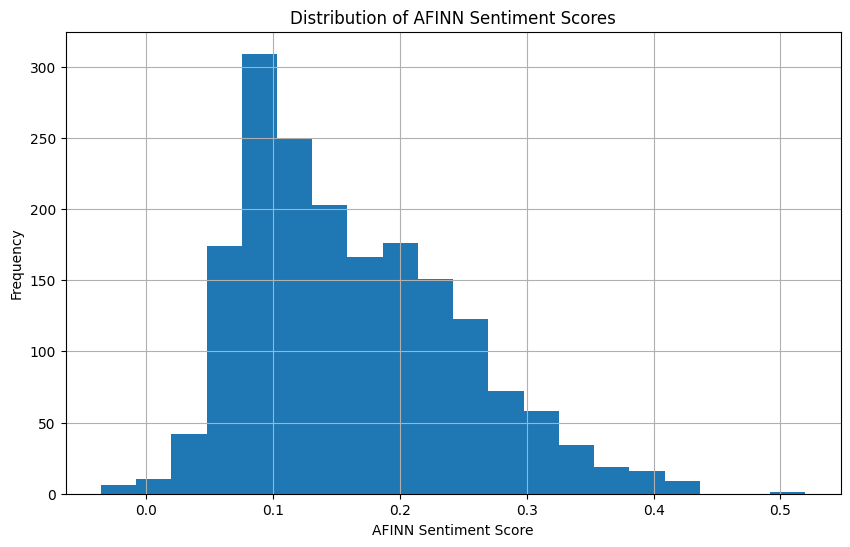

In [75]:
plt.figure(figsize=(10, 6))
df['Mean Affin Sentiment'].hist(bins=20)
plt.title('Distribution of AFINN Sentiment Scores')
plt.xlabel('AFINN Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Based on the distribution for AFINN sentiment score, most sentiment scores fall between 0.1 and 0.3 therefore the overall sentiment scores tend to be low positive. Where the AFINN lexicon assigns words with scores ranging from -5 (very negative) to +5 (very positive). The concentration of sentiment scores around 0.1 to 0.3 suggests that most of the analyzed text data had relatively low positive sentiment.

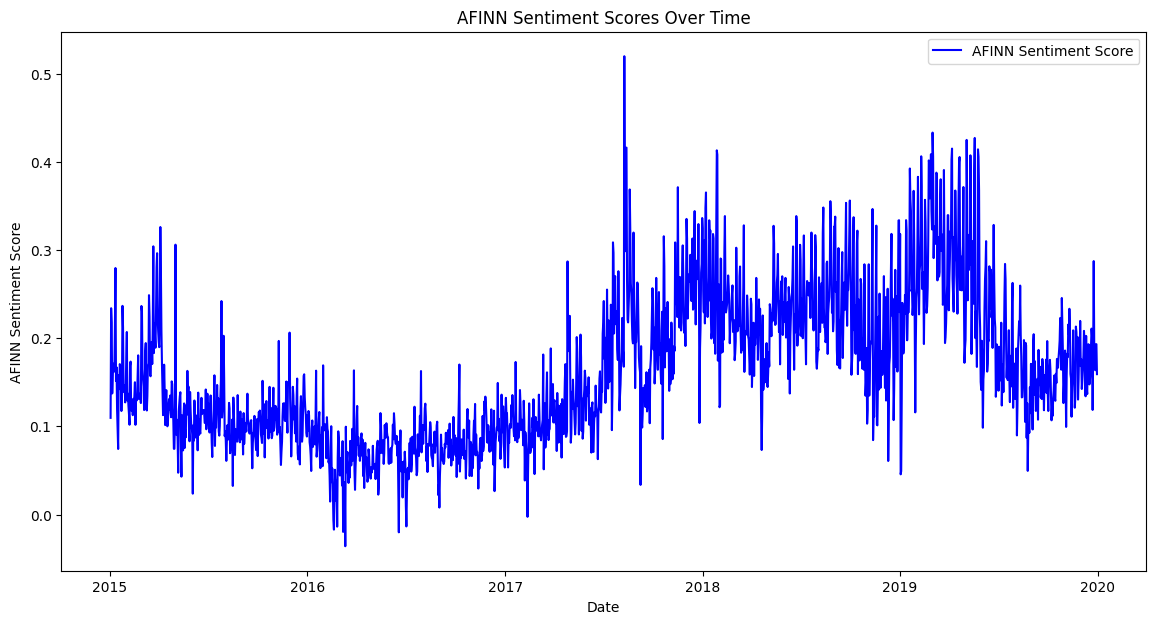

In [76]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['Mean Affin Sentiment'], label='AFINN Sentiment Score', color='blue')
plt.xlabel('Date')
plt.ylabel('AFINN Sentiment Score')
plt.title('AFINN Sentiment Scores Over Time')
plt.legend()
plt.show()


Based on the chart we can see that the sentiment score fluctuates above and below the zero baseline. During 2016-2017 sentiment scores are nearly zero and then later the sentiment scores shows mixed trends.

# Model Building

In this part, we discuss how we developed and selected machine learning models for predicting stock prices using a dataset that included both numerical stock data and sentiment scores generated from tweets. Our goal is to create a predictive model that successfully utilizes both numerical and sentiment variables gathered from textual data to increase the accuracy of stock price forecasting.


***Defining the Target Variable and Features***

We first define our target variable ‘y’ as the adjusted closing prices (‘Adj Close’) from our DataFrame ‘df’, which we aim to predict. To process the tweets, we use a ‘TfidfVectorizer’ to transform the tokenized tweets into a numerical matrix of TF-IDF features, considering the top 100 features. This step converts textual data into a format suitable for machine learning models. To further streamline the data, we apply ‘TruncatedSVD’ to reduce the dimensionality of these features to 10 components, capturing the essential information while reducing complexity.

Next, we combine these reduced tweet features with additional numerical data from the DataFrame, including ‘Open’, ‘Volume’, and various sentiment scores and counts. This results in the final feature matrix ‘X’, which integrates both tweet-derived features and stock market data. Our code consists of ‘X’, the feature matrix, and ‘y’, the target variable, both of which are now prepared for training and evaluating machine learning models to predict stock prices.


In [77]:
# target variable
y = df['Adj Close']

# tweets into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
tweet_features = vectorizer.fit_transform(df['tokenized_tweet_list'].astype(str))

# reducing dimensionality of tweet features
svd = TruncatedSVD(n_components=10)
tweet_features_reduced = svd.fit_transform(tweet_features)

numerical_features = df[['Open', 'Volume', 'positive_sentiment', 'negative_sentiment',
                         'neutral_sentiment', 'positive_count', 'negative_count',
                         'neutral_count', 'overall_sentiment']]
X = np.hstack((numerical_features, tweet_features_reduced))

***Ensuring Proper Time-Series Split***

We initialize ‘TimeSeriesSplit’ with ‘n_splits=5’, which means the data will be divided into five sequential train-test splits. This approach ensures that the model is validated on different portions of the data, maintaining the temporal structure. By splitting the data this way, we can evaluate the model's performance on different time periods, leading to a more robust understanding of its predictive capabilities.

In [78]:
# Ensuring proper time-series split
tscv = TimeSeriesSplit(n_splits=5)

***Regression Model: Linear Regression and Random Forest***

In [79]:
models = []
results = []

model_dict = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

***Function to Evaluate The Model***

We used a function to evaluate the model performance inorder to find Mean Squared Error, and R-Squared.


In [80]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, r2

***Linear Regression Model***

In [81]:
linear_regression_pipeline = None
split_number = 1

linear_regression_rmse_values = []
linear_regression_r2_values = []
linear_regression_mae_values = []
linear_regression_mse_values = []

#within each fold of 'TimeSeriesSplit', the data is split to training and testing sets
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_regression, k=9)), 
        ('model', LinearRegression()) 
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse, r2 = evaluate_model(y_test, y_pred)
    results.append(('Linear Regression', mse, r2))
    models.append(('Linear Regression', pipeline))
    
    linear_regression_pipeline = pipeline

    linear_regression_rmse_values.append(mse ** 0.5)
    linear_regression_mae_values.append(mean_absolute_error(y_test, y_pred))
    linear_regression_r2_values.append(r2)
    linear_regression_mse_values.append(mse)
    
    print(f"Time Split {split_number}: Model - Linear Regression:")
    print(f"RMSE: {mse ** 0.5}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2: {r2}")
    print()

    split_number += 1

Time Split 1: Model - Linear Regression:
RMSE: 0.47194164601307287
MAE: 0.3983901661465585
R2: 0.921310928342901

Time Split 2: Model - Linear Regression:
RMSE: 1.0129607147257165
MAE: 0.8842557362907941
R2: 0.9285601547757462

Time Split 3: Model - Linear Regression:
RMSE: 1.0629084475404078
MAE: 0.9372355257096845
R2: 0.7871098712046762

Time Split 4: Model - Linear Regression:
RMSE: 0.7412836335334432
MAE: 0.5575046647929918
R2: 0.9815139680661381

Time Split 5: Model - Linear Regression:
RMSE: 1.0424894792425334
MAE: 0.8803790111520046
R2: 0.9810802539395936



We're implementing a time series cross-validation procedure to evaluate the performance of a Linear Regression model. We start by splitting the data into training and testing sets using ‘TimeSeriesSplit’, ensuring that we preserve the temporal order of the data. Then, we scale the features and select the best features using ‘SelectKBest’ with F-regression. After that, we fit a Linear Regression model to each split.

Following each split, we compute evaluation metrics such as RMSE, MAE, and R2 score to assess the model's predictive accuracy and goodness of fit. By doing this, we gain insights into how well the model generalizes to unseen data across various time periods. The pipeline we use includes standard scaling, feature selection, and Linear Regression as the final model.

Across the time splits, we identify the best performing metrics for the Linear Regression model. Notably, in Time Split 1, we observe a low RMSE of approximately 0.47, indicating the model's superior predictive accuracy during that period. Additionally, Time Split 4 stands out with an impressive R2 score of approximately 0.98, suggesting a strong correlation between the model's predictions and the actual values. 


***Evaluation of Linear Regression Model***

In [82]:
average_linear_regression_rmse = np.mean(linear_regression_rmse_values)
average_linear_regression_mae = np.mean(linear_regression_mae_values)
average_linear_regression_r2 = np.mean(linear_regression_r2_values)
average_linear_regression_mse = np.mean(linear_regression_mse_values)

print("Average RMSE for Linear Regression:", average_linear_regression_rmse)
print("Average MSE for Linear Regression:", average_linear_regression_mse)
print("Average MAE for Linear Regression:", average_linear_regression_mae)
print("Average R2 for Linear Regression:", average_linear_regression_r2)

Average RMSE for Linear Regression: 0.8663167842110348
Average MSE for Linear Regression: 0.8029756868695671
Average MAE for Linear Regression: 0.7315530208184067
Average R2 for Linear Regression: 0.919915035265811


In our evaluation of the Linear Regression model, we calculate the average performance metrics to gain a comprehensive understanding of its overall effectiveness. By averaging the RMSE, MSE, MAE, and R2 score values computed across different time splits, we obtain a representative summary of the model's predictive accuracy and goodness of fit. The average RMSE value of approximately 0.87 indicates the typical deviation between the model's predictions and the actual values, providing insight into its overall predictive accuracy. Moreover, with an average R2 score of approximately 0.92, we observe a strong correlation between the model's predictions and the observed outcomes, suggesting that the model explains a significant proportion of the variance in the data.

***Random Forest Model***

In [83]:
random_forest_pipeline = None 
split_number = 1

random_forest_rmse_values = []
random_forest_r2_values = []
random_forest_mse_values = []
random_forest_mae_values = []

#within each fold of 'TimeSeriesSplit', the data is split to training and testing sets
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_regression, k=9)), 
        ('model', RandomForestRegressor()) 
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse, r2 = evaluate_model(y_test, y_pred)
    results.append(('Random Forest', mse, r2))
    models.append(('Random Forest', pipeline))
    
    random_forest_pipeline = pipeline

    random_forest_rmse_values.append(mse ** 0.5)
    random_forest_r2_values.append(r2)
    random_forest_mae_values.append(mean_absolute_error(y_test, y_pred))
    random_forest_mse_values.append(mse)
    
    print(f"Time Split {split_number}: Model - Random Forest:")
    print(f"RMSE: {mse ** 0.5}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2: {r2}")
    print()

    split_number += 1

Time Split 1: Model - Random Forest:
RMSE: 1.6774037440842542
MAE: 1.3317825131353183
R2: 0.0059390079092211945

Time Split 2: Model - Random Forest:
RMSE: 3.194817833928161
MAE: 2.4628445196039555
R2: 0.28936351677865857

Time Split 3: Model - Random Forest:
RMSE: 3.6838099862609988
MAE: 3.091826884521452
R2: -1.5571620413986942

Time Split 4: Model - Random Forest:
RMSE: 5.785203267853381
MAE: 4.212787751551173
R2: -0.12593189371461233

Time Split 5: Model - Random Forest:
RMSE: 5.505871637206903
MAE: 3.2298750462706125
R2: 0.472255026340061



We conducted a time series cross-validation process to evaluate the performance of a Random Forest Regression model. Similar to the Linear Regression evaluation, we split the data into training and testing sets using ‘TimeSeriesSplit’, ensuring temporal integrity. Within each split, we apply preprocessing steps including feature scaling and selection using ‘SelectKBes’t with F-regression, before fitting the Random Forest model to the data.

When we examine the output, we observe varying performance across the time splits. Notably, Time Split 1 stands out with a relatively lower RMSE of approximately 1.68 and Time Split 5 stands out with a higher R2 score of around 0.47, suggesting better predictive accuracy and explanatory power during that period compared to the other periods. However, Time Split 3 and Time Split 4 exhibits notably poorer performance with a negative R2 score, indicating that the model struggles to explain the variance in the data during that specific period.



***Evaluation of Random Forest Model***

In [84]:
average_random_forest_regression_rmse = np.mean(random_forest_rmse_values)
average_random_forest_regression_r2 = np.mean(random_forest_r2_values)
average_random_forest_regression_mae = np.mean(random_forest_mae_values)
average_random_forest_regression_mse = np.mean(random_forest_mse_values)

print("Average RMSE for Random Forest:", average_random_forest_regression_rmse)
print("Average R2 for Random Forest:", average_random_forest_regression_r2)
print("Average MAE for Random Forest:", average_random_forest_regression_mae)
print("Average MSE for Random Forest:", average_random_forest_regression_mse)

Average RMSE for Random Forest: 3.96942129386674
Average R2 for Random Forest: -0.18310727681707314
Average MAE for Random Forest: 2.865823343016502
Average MSE for Random Forest: 18.074839932662087


In our Random Forest Regression model, we compute the average performance metrics to provide a consolidated view of its overall effectiveness. By averaging the RMSE, R2 score, MAE, and MSE values calculated across different time splits, we derive representative summaries of the model's predictive accuracy and goodness of fit.

The average RMSE of approximately 3.97 indicates the typical deviation between the model's predictions and the actual values, offering insight into its overall predictive precision. However, with an average R2 score of around -0.18, we observe a negative value, suggesting that the model's predictions fail to explain the variance present in the dataset, indicating potential limitations in its performance.


***Time-Series Model: Prophet Model***

In [85]:
prophet_data = df[['date', 'Adj Close']].rename(columns={'date': 'ds', 'Adj Close': 'y'})

prophet_model = Prophet()

prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=365) 
forecast = prophet_model.predict(future)

actual_values = prophet_data['y']
predicted_values = forecast['yhat'][:len(actual_values)]  

prophet_rmse = mean_squared_error(actual_values, predicted_values)
prophet_mse = mean_squared_error(actual_values, predicted_values)** 0.5
prophet_mae = mean_absolute_error(actual_values, predicted_values)
prophet_r2 = r2_score(actual_values, predicted_values)

17:13:50 - cmdstanpy - INFO - Chain [1] start processing
17:13:54 - cmdstanpy - INFO - Chain [1] done processing


In the code snippet, we utilize the Prophet library to perform time series forecasting on stock market data. Initially, we preprocess the dataset, selecting relevant columns ('date' and 'Adj Close') and renaming them to 'ds' (date) and 'y' (target variable). We then initialize a Prophet model and fit it to the prepared data. Next, we generate future dates using the make_future_dataframe method, extending the time horizon by 365 days, and subsequently predicting the values using the fitted model.
In assessing the output, we observe the Prophet model's predictions alongside the actual values, allowing us to gauge its performance. The calculated metrics, including RMSE, MAE, and R-squared, offer quantitative measures of the model's predictive accuracy and goodness of fit. 


***Evaluation of Prophet Model***

In [86]:
print("RMSE and R2 for Prophet Model:")
print(f"RMSE: {prophet_rmse}")
print(f"MSE: {prophet_mse}")
print(f"MAE: {prophet_mae}")
print(f"R2: {prophet_r2 }")

RMSE and R2 for Prophet Model:
RMSE: 1.9021365004076678
MSE: 1.3791796476194347
MAE: 1.0659246639574318
R2: 0.9847983705889168


Here we present the evaluation results for the Prophet model's performance metrics. The calculated RMSE of approximately 1.90 signifies the average magnitude of errors between the actual and predicted values, providing insights into the model's predictive accuracy. Complementarily, the calculated MSE, which is the square root of the RMSE, stands at around 1.38, offering a similar measure of prediction error. Moreover, the MAE of approximately 1.07 represents the average magnitude of absolute errors between the predicted and actual values, further illustrating the model's accuracy in forecasting.

Most notably, the R-squared value of approximately 0.98 indicates an exceptionally strong correlation between the predicted and observed values. This high R-squared value suggests that the Prophet model explains approximately 98% of the variance in the data, highlighting its effectiveness in capturing underlying patterns and trends in the stock market data.


***Model Selection***

In this snippet, we determine the best-performing model based on the highest average R2 score among three different models: Linear Regression, Random Forest, and Prophet. We compare the average R2 scores computed earlier for each model and select the one with the highest R2 score as the best model. Here, we identify the Prophet model as the best performer based on R2.

The output confirms our selection of the best model based on the average R2 metric. By identifying the Prophet model as the top performer, we acknowledge its superior ability to explain the variance in the data among the evaluated models.


In [87]:
# highest r2
best_model = max([average_linear_regression_r2, average_random_forest_regression_r2, prophet_r2])
if best_model == average_linear_regression_r2:
    print("Best Model based on R2: Linear Regression")
    best_model_name = "Linear Regression"
elif best_model == average_random_forest_regression_r2:
    print("Best Model based on R2: Random Forest")
    best_model_name = "Random Forest"
else:
    print("Best Model based on R2: Prophet")
    best_model_name = "Prophet"

Best Model based on R2: Prophet


Here we determine the best-performing model based on the lowest average RMSE among three different models: Linear Regression, Random Forest, and Prophet. We compare the average RMSE values computed earlier for each model and select the one with the lowest RMSE as the best model. Here, we identify the Linear Regression model as the best performer based on RMSE.
By identifying the Linear Regression model as the top performer, we acknowledge its superiority in terms of predictive accuracy among the evaluated models.


In [88]:
# lowest average RMSE
best_model_rmse = min(average_linear_regression_rmse, average_random_forest_regression_rmse, prophet_rmse)

if best_model_rmse == average_linear_regression_rmse:
    print("Best Model based on RMSE: Linear Regression")
    best_model_name = "Linear Regression"
    best_model_pipeline = linear_regression_pipeline
elif best_model_rmse ==  average_random_forest_regression_rmse:
    print("Best Model based on RMSE: Random Forest")
    best_model_name = "Random Forest"
    best_model_pipeline = random_forest_pipeline
else:
    print("Best Model based on RMSE: Prophet")
    best_model_name = "Prophet"
    best_model_pipeline = prophet_pipeline


Best Model based on RMSE: Linear Regression


When selecting a predictive model, we prioritize the model with the lowest Root Mean Square Error (RMSE) over the one with the highest R-squared (R²). RMSE provides a direct measure of the average prediction errors in the same units as the target variable, making it easy to interpret. It is also sensitive to large errors, penalizing models that make significant mistakes more heavily. This sensitivity is crucial in applications where large errors are particularly undesirable.

Additionally, RMSE allows for effective comparison across different models on the same dataset, directly indicating better predictive accuracy with lower values. In contrast, R² measures the proportion of variance explained but can be misleading due to overfitting and does not convey the magnitude of prediction errors. 

Thus, RMSE is a more practical and reliable metric for assessing and selecting the best predictive model, as it directly reflects performance and highlights potential issues like overfitting.

Therefore, we considered Linear regression as the best model that suits our dataset .

# Evaluation of Model Performance

In the world of financial markets, making accurate predictions regarding stock price changes is critical for investors looking to maximize profits. Integrating many data sources, such as stock prices and sentiment analysis of social media data, such as tweets, can yield important insights into market trends and prospective trading opportunities. However, the effectiveness of predictive models must be extensively tested in order to assure dependable decision-making.

This evaluation procedure includes determining the possible advantages and variability of profitability based on model predictions. By calculating hypothetical trading profits or losses based on expected price changes, investors can assess the models' ability to generate actionable insights. Additionally, studying the variability of profitability aids in understanding the model's robustness under various market conditions and scenarios.


      Actual Prices  Predicted Prices  Positions  Daily Profits   
1814      70.397675         70.440044          1      -0.000379  \
1815      70.397675         70.434473          1       0.000000   
1816      70.397675         70.537534          1       0.000000   
1817      70.815498         70.094871         -1       0.005935   
1818      70.815498         70.154298         -1      -0.000000   

      Cumulative Profits  
1814            0.246244  
1815            0.246244  
1816            0.246244  
1817            0.253641  
1818            0.253641  


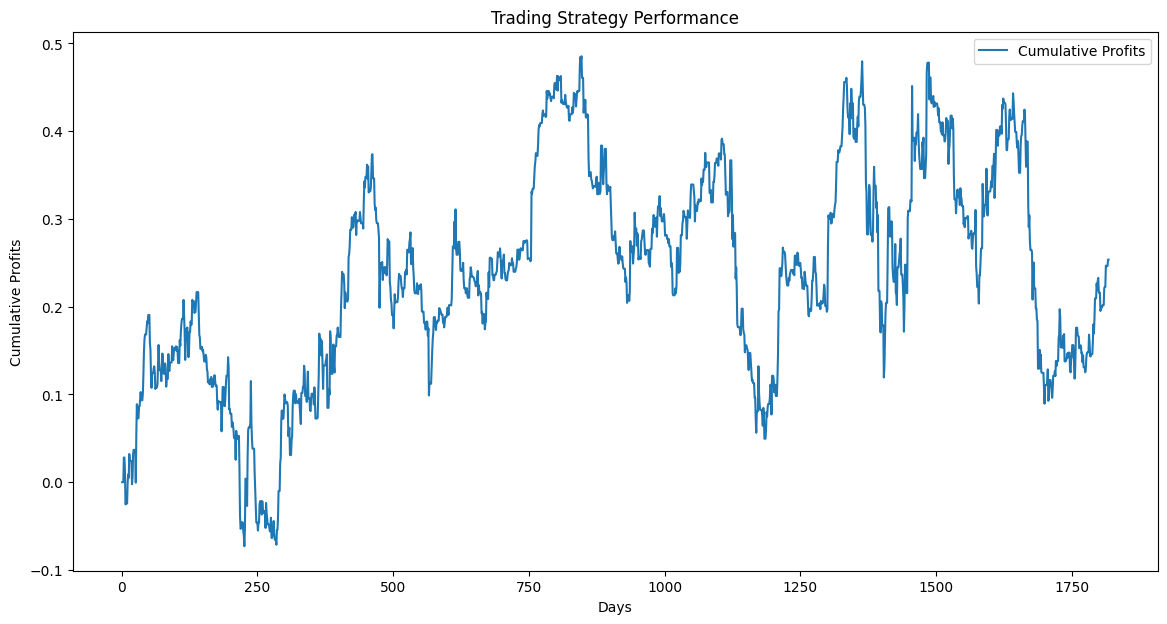

In [89]:
def trading_strategy(predictions, actual_prices):
    # Buy (1) if predicted price > previous actual price, otherwise sell (-1)
    positions = np.where(predictions > actual_prices.shift(1), 1, -1)  
    return pd.Series(positions, index=actual_prices.index)

def calculate_profits(positions, actual_prices):
    # daily returns
    daily_returns = actual_prices.pct_change() 
    profits = positions.shift(1) * daily_returns 
    profits.fillna(0, inplace=True) 
    cumulative_profits = (profits + 1).cumprod() - 1
    return profits, cumulative_profits

def evaluate_model_performance(model, X, y, df):
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    positions = trading_strategy(y_pred, y)
    
    profits, cumulative_profits = calculate_profits(positions, y)
    
    performance_df = pd.DataFrame({
        'Actual Prices': y,
        'Predicted Prices': y_pred,
        'Positions': positions,
        'Daily Profits': profits,
        'Cumulative Profits': cumulative_profits
    }, index=df.index)
    
    return performance_df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_model = best_model_pipeline.named_steps['model']
performance_df = evaluate_model_performance(best_model, X_scaled, y, df)

print(performance_df.tail())

plt.figure(figsize=(14, 7))
plt.plot(performance_df['Cumulative Profits'], label='Cumulative Profits')
plt.title('Trading Strategy Performance')
plt.xlabel('Days')
plt.ylabel('Cumulative Profits')
plt.legend()
plt.show()

To analyze the performance of your trading model, we used a methodical approach that included:

Define the Trading Strategy:
We built a trading_strategy function to establish the trading position based on the model's predictions. If the forecasted price exceeds the prior actual price, the strategy suggests a buy (position 1), otherwise a sell (position -1).

Calculating profits:
We created the calculate_profits function, which calculates daily returns and resulting profits based on trading positions. Cumulative profits are also calculated to track the progress of an investment over time.

Evaluate Model Performance:
The evaluate_model_performance function applies the model to the data, predicts, and calculates trading positions and profits. The results are combined into a DataFrame for analysis.

Scale the Data:
Data was scaled with StandardScaler to ensure that features were on the same scale, which is a typical preprocessing step for many machine learning techniques.

Model Evaluation and Visualization:
The model's performance was assessed using the top-performing model based on RMSE. The results were represented graphically by showing the cumulative profits over time.

According to the output:
The performance_df displays the actual prices, predicted prices, trading positions, daily earnings, and cumulative profits over the last few days of data.

The cumulative profit plot depicts the trading strategy's success over time, highlighting profitability swings.

In [90]:
# metrics
average_daily_return = performance_df['Daily Profits'].mean()
std_dev_of_returns = performance_df['Daily Profits'].std()
total_profit = performance_df['Cumulative Profits'].iloc[-1]

print("Performance Metrics:")
print(f"Average Daily Return: {average_daily_return}")
print(f"Standard Deviation of Returns: {std_dev_of_returns}")
print(f"Total Profit: {total_profit}")
daily_returns = performance_df['Daily Profits']
cumulative_returns = performance_df['Cumulative Profits']
average_daily_return = daily_returns.mean()
volatility = daily_returns.std()
sharpe_ratio = (average_daily_return / volatility) * np.sqrt(252)  # Assuming 252 trading days in a year
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

print(f"Average Daily Return: {average_daily_return:.2%}")
print(f"Volatility (Standard Deviation of Daily Returns): {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")


Performance Metrics:
Average Daily Return: 0.0002087930462966896
Standard Deviation of Returns: 0.013019066614581642
Total Profit: 0.25364073465827297
Average Daily Return: 0.02%
Volatility (Standard Deviation of Daily Returns): 1.30%
Sharpe Ratio: 0.25
Maximum Drawdown: -189.76%


The performance metrics reveal several key insights into the stock's behavior over the examined period. The average daily return is approximately 0.02%, indicating a modest daily profit. The volatility, measured as the standard deviation of daily returns, stands at 1.30%, reflecting the variability in daily returns. The total profit, represented by the cumulative profits, is about 25.36%, showcasing a substantial gain over the entire period. The Sharpe Ratio, a measure of risk-adjusted return, is 0.25, suggesting that the returns relative to the risk are moderate. However, a significant concern is highlighted by the maximum drawdown of -189.76%, indicating that at some point, the portfolio experienced a substantial loss relative to its peak value. This high drawdown implies considerable risk and potential for loss, which is crucial for investors to consider when evaluating the stock's performance.


Summary Statistics of Daily Profits:
count    1818.000000
mean        0.000209
std         0.013019
min        -0.066331
25%        -0.003706
50%         0.000000
75%         0.004093
max         0.099607
Name: Daily Profits, dtype: float64

Summary Statistics of Cumulative Profits:
count    1818.000000
mean        0.236261
std         0.120222
min        -0.072998
25%         0.147753
50%         0.239145
75%         0.321497
max         0.485433
Name: Cumulative Profits, dtype: float64


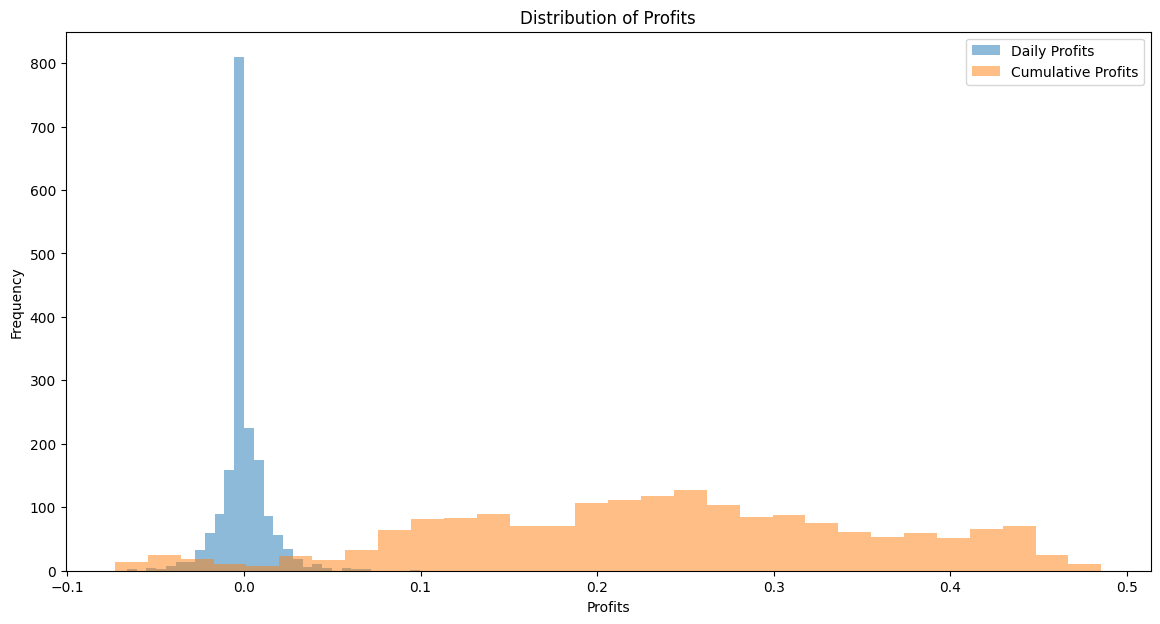


Value at Risk (VaR) at 95% confidence level: 0.0351603095084571
Conditional Value at Risk (CVaR) at 95% confidence level: -0.02339092214257702


In [91]:
print("\nSummary Statistics of Daily Profits:")
print(performance_df['Daily Profits'].describe())

print("\nSummary Statistics of Cumulative Profits:")
print(performance_df['Cumulative Profits'].describe())


plt.figure(figsize=(14, 7))
plt.hist(performance_df['Daily Profits'], bins=30, alpha=0.5, label='Daily Profits')
plt.hist(performance_df['Cumulative Profits'], bins=30, alpha=0.5, label='Cumulative Profits')
plt.title('Distribution of Profits')
plt.xlabel('Profits')
plt.ylabel('Frequency')
plt.legend()
plt.show()


var_95 = np.percentile(performance_df['Cumulative Profits'], 5)
cvar_95 = performance_df['Cumulative Profits'][performance_df['Cumulative Profits'] <= var_95].mean()
print("\nValue at Risk (VaR) at 95% confidence level:", var_95)
print("Conditional Value at Risk (CVaR) at 95% confidence level:", cvar_95)

Furthermore we have calculated some summery statistics based in the profits.

Daily Profits:

The average daily profit is about  0.000209 percent. This indicates a somewhat positive daily return from the trading approach.

Standard deviation (0.013019)

The standard deviation for daily profits is 1.3019%. This reflects the fluctuation in daily returns. While the mean is positive, the standard deviation indicates significant daily variation.

Minimum and Maximum: (-0.066331, 0.099607) - The daily profits range from a loss of 6.63% to a gain of 9.96%. This large range emphasizes the possibility of both significant gains and losses on any given day.

Percentiles: 25%, 50%, and 75%

The 25th percentile is -0.003706%, which means that 25% of daily profits are less than this amount.
The median (50th percentile) is 0.000%, indicating that 50% of daily returns are zero or negative.
The 75th percentile is 0.004093%, which means that 75% of all daily returns are smaller than this amount.



Cumulative Profits: 

The average cumulative profit is around 23.62 percent. This suggests that the technique generates a significant positive return on average across the full time period.

Standard deviation (0.120222) 

The standard deviation of cumulative earnings is 12.02%, indicating significant variability in total profitability over time.

Minimum and Maximum: (-0.072998, 0.485433) 
The total profits vary from a loss of 7.29% to a gain of 48.54%. This range represents the possible extremes of the strategy's performance across the period.

Percentiles: 25%, 50%, and 75%
The 25th percentile is 14.77%, which means that cumulative profits fall short of this figure 25% of the time.
The median cumulative profit is 23.91%, which means that half of the cumulative earnings fall below this amount.
The 75th percentile is 32.14%, which means that 75% of total profits fall below this level.



The study reveals that the trading strategy has a generally positive anticipated return with significant variability.
The significant standard deviation in daily profits reflects the strategy's volatility. This can result in significant gains and losses on individual days.
The cumulative profit distribution illustrates that the technique normally works well, but there are times when it may result in losses, as evidenced by the negative minimum cumulative profit.


The histogram for daily earnings, shown in blue, has a concentration near 0, indicating that the majority of daily returns are zero. This distribution is significantly tilted to the right, indicating that a small number of days produce considerable positive returns. The big rise near zero demonstrates that many trading days produce negligible gains or losses. The frequency of daily gains is highest near zero, and decreases as profits approach the positive and negative extremes, indicating little daily volatility but some noticeable outliers.
In contrast, the cumulative profit histogram (shown in orange) has a larger spread. This indicates the long-term accumulation of returns, which is more evenly distributed than daily profits. The cumulative earnings range between -0.1 and 0.5, demonstrating the strategy's long-term performance. The positive skew in cumulative earnings, with more occurrences of larger profits, indicates the strategy's potential to create significant long-term gains in the face of daily volatility. This larger distribution of cumulative profits versus daily profits emphasizes the compounding influence of returns over time.


At the 95% confidence level, the Value at Risk (VaR) is around 0.0352, indicating that the daily returns are unlikely to fall below this level. This relatively moderate VaR suggests there is some risk of experiencing notable losses, but it is not excessively high. The Conditional Value at Risk (CVaR) at the 95% confidence level is around -0.0234, representing the average loss in the worst 5% of scenarios where losses exceed the VaR threshold. This negative CVaR indicates that in adverse conditions, the strategy could incur substantial losses, highlighting the need for caution.


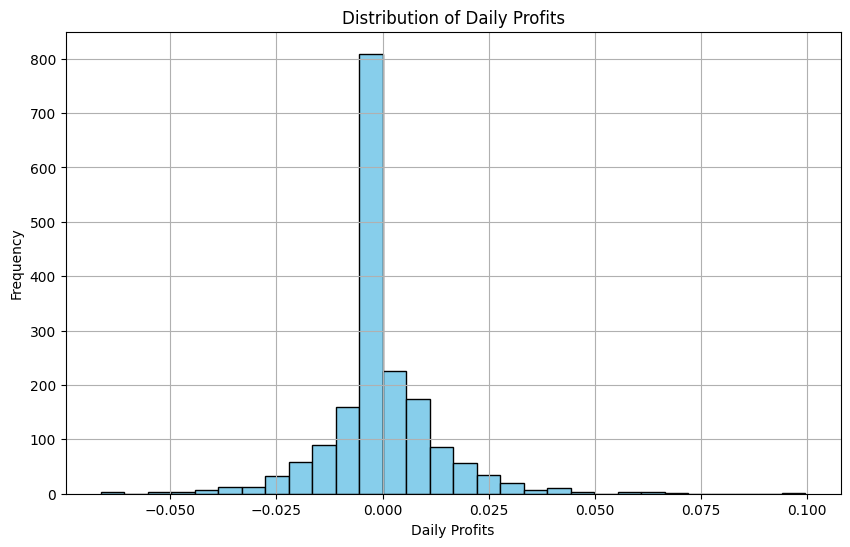

In [92]:
# distribution of daily profits
plt.figure(figsize=(10, 6))
plt.hist(performance_df['Daily Profits'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Profits')
plt.xlabel('Daily Profits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The above plot  is a histogram of the daily profits generated by a trading strategy.
The distribution appears to be skewed to the right, meaning there are more frequent profits that are smaller in value compared to larger profits. There might be a few outliers on the right side of the distribution, representing days with significantly higher profits.


In [110]:
# IQR
Q1 = np.percentile(performance_df['Daily Profits'], 25)
Q3 = np.percentile(performance_df['Daily Profits'], 75)
IQR = Q3 - Q1

print(f"Interquartile Range (IQR) of Daily Profits: {IQR}")

Interquartile Range (IQR) of Daily Profits: 0.00779927467323438


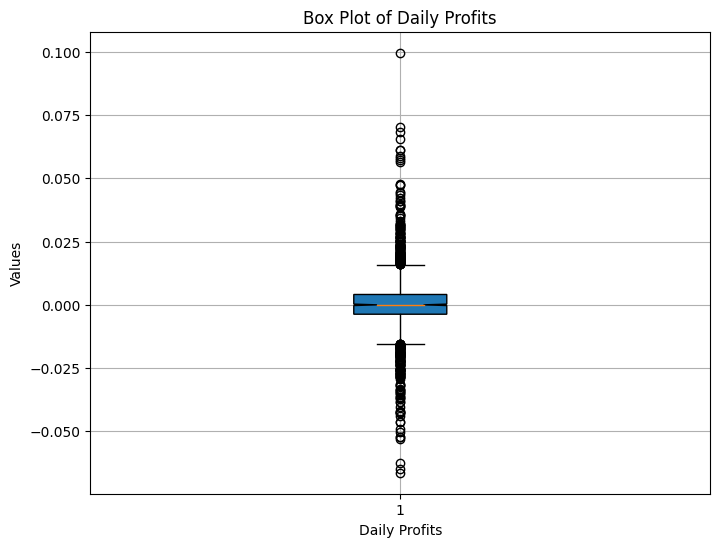

In [93]:
# box plot
plt.figure(figsize=(8, 6))
plt.boxplot(performance_df['Daily Profits'], notch=True, vert=True, patch_artist=True)
plt.title('Box Plot of Daily Profits')
plt.xlabel('Daily Profits')
plt.ylabel('Values')
plt.grid(True)
plt.show()

The box plot of daily earnings illustrates the distribution, central tendency, and variability of the trading strategy's daily returns. The median daily profit is nearly zero, indicating that most daily profits are tiny. The interquartile range (IQR), indicated by the box, indicates that the middle 50% of the data ranges between -0.003 and 0.004. There are numerous outliers on both the positive and negative sides, indicating occasional huge wins and losses, which corresponds to the observed volatility in daily profits. The whiskers extend to roughly -0.0663 and 0.0996, demonstrating the presence of extreme values outside the center range and emphasizing the unpredictability in daily trading success.

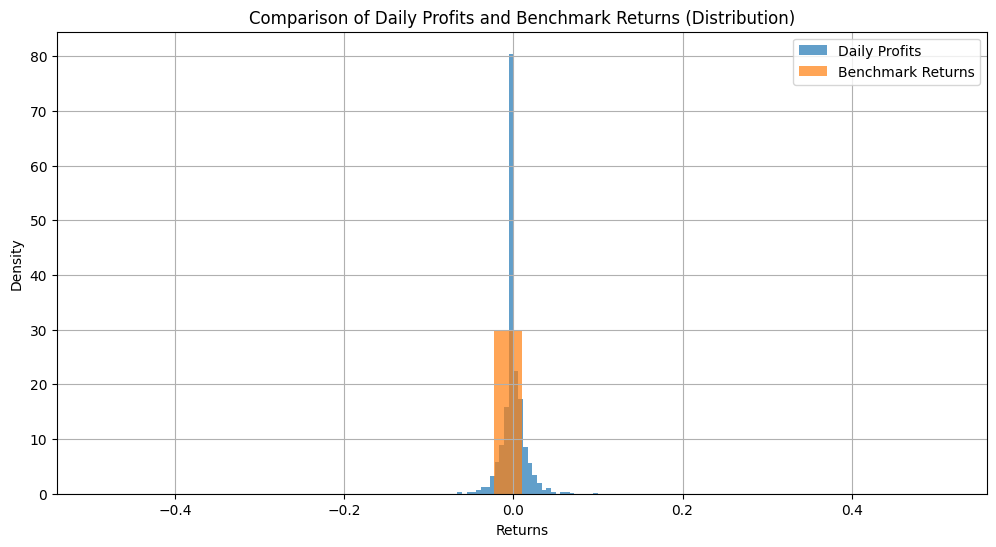

In [95]:
benchmark_returns = pd.Series([0.01 for _ in range(len(performance_df))])  # Placeholder for benchmark returns

combined_df = pd.DataFrame({
    'Daily Profits': performance_df['Daily Profits'],
    'Benchmark Returns': benchmark_returns
})

plt.figure(figsize=(12, 6))
plt.hist(combined_df['Daily Profits'], bins=30, alpha=0.7, label='Daily Profits', density=True)
plt.hist(combined_df['Benchmark Returns'], bins=30, alpha=0.7, label='Benchmark Returns', density=True)
plt.title('Comparison of Daily Profits and Benchmark Returns (Distribution)')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

The histogram compares the distribution of daily profits to the benchmark returns. The 'Benchmark Returns' histogram displays a peak at 0 on the x-axis, indicating a concentration of values near zero return. In comparison, the 'Daily Profits' histogram looks to have a significantly lower overall density, indicating that there may be fewer or less frequent data points, as well as an outlier distorting the scale. This comparison sheds light on the strategy's performance in contrast to a benchmark, allowing for a rapid visual assessment of how frequently and far returns stray from zero, implying volatility or stability in earnings relative to the benchmark.

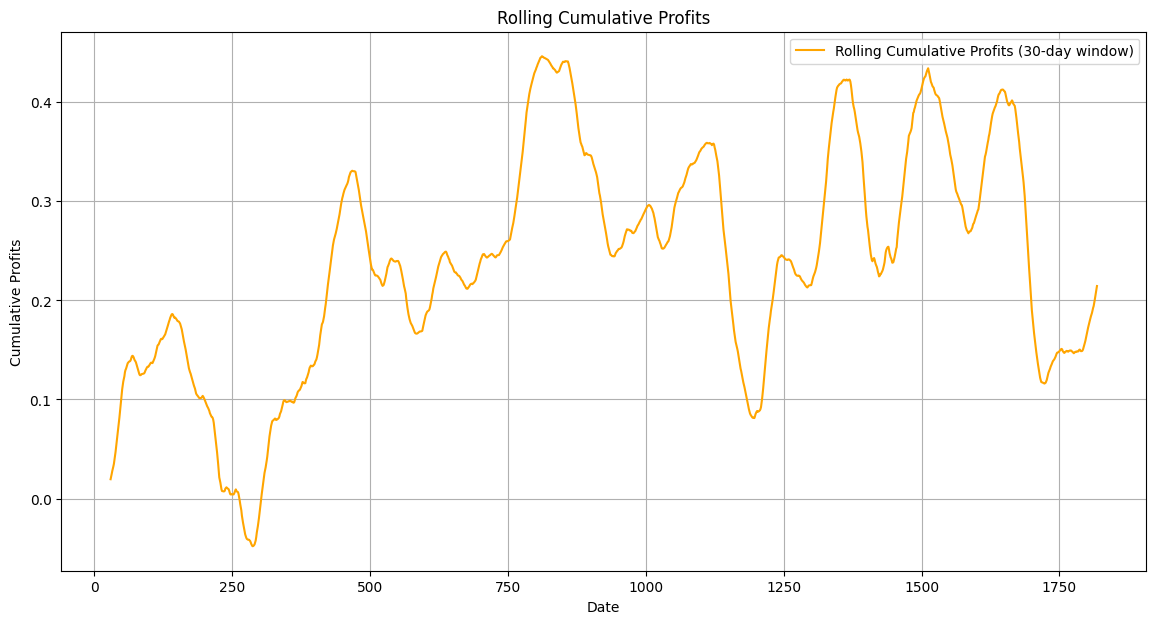

In [96]:
# rolling cumulative profits
rolling_cumulative_profits = performance_df['Cumulative Profits'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(rolling_cumulative_profits, label='Rolling Cumulative Profits (30-day window)', color='orange')
plt.title('Rolling Cumulative Profits')
plt.xlabel('Date')
plt.ylabel('Cumulative Profits')
plt.legend()
plt.grid(True)
plt.show()

The plot above depicts a line graph of rolling cumulative earnings.

In general, rolling cumulative profits represent the average cumulative profit over a certain time period. It is calculated by averaging the cumulative profits across the most recent window of dates.  This can help level out data swings and gain a better idea of the overall earnings trend.
However, the line is often upward sloping, indicating that earnings are increasing with time. The data also shows considerable instability, as demonstrated by the line's ups and downs. This volatility could be attributed to a variety of variables, including seasonality and changes in the business climate.


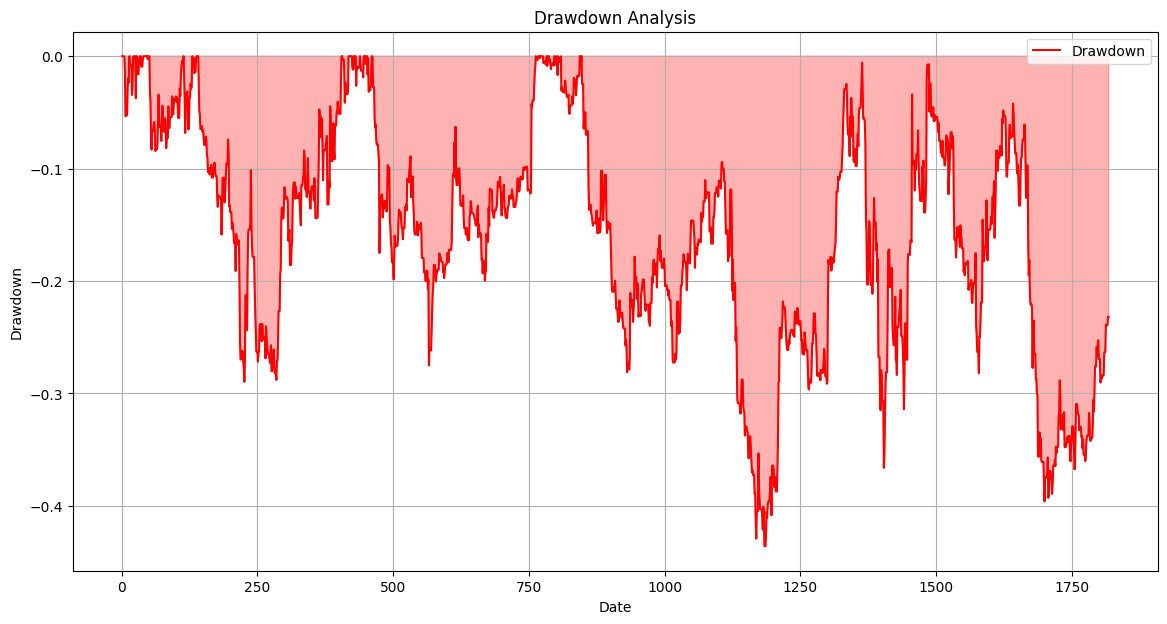

In [97]:
# drawdowns
cumulative_profits = performance_df['Cumulative Profits']
drawdown = (cumulative_profits - cumulative_profits.cummax())

plt.figure(figsize=(14, 7))
plt.plot(drawdown, label='Drawdown', color='red')
plt.fill_between(drawdown.index, drawdown, 0, where=drawdown < 0, color='red', alpha=0.3)
plt.title('Drawdown Analysis')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

The "Drawdown Analysis" graph above depicts a red line showing the drawdown over time. The y-axis depicts the drawdown, while the x-axis represents the dates. The area under the red line is partially opaque.
The greatest drawdown appears to be about -0.45, representing a possible 45% loss from the top cumulative profit.  The decline appears to have occurred gradually over time, rather than as a precipitous drop. The image's x-axis lacks particular dates, making it difficult to identify the recovery period. However, we can see that the decline line looks to be flattening down near the conclusion, which may indicate recovery.

In [98]:
# drawdown
cumulative_profits = performance_df['Cumulative Profits']
drawdown = (cumulative_profits - cumulative_profits.cummax())

# maximum drawdown
max_drawdown = drawdown.min()

# average drawdown depth
avg_drawdown_depth = drawdown[drawdown < 0].mean()

print("Maximum Drawdown:", max_drawdown)
print("Average Drawdown Depth:", avg_drawdown_depth)

Maximum Drawdown: -0.4358736725409682
Average Drawdown Depth: -0.1645457696245659


The examination of the drawdown measures indicates that Apple Co. has experienced a maximum drawdown of -0.44, representing a 43.59% drop from its peak cumulative profits. This signifies a substantial decrease in the investment's value at some point in time. The average drawdown depth of -0.16 reinforces this by illustrating the average magnitude of drawdowns encountered across the investment period. Simply put, the investment fell by an average of 16.45% from its highest value.

Maximum Drawdown: 0.5584306287174124


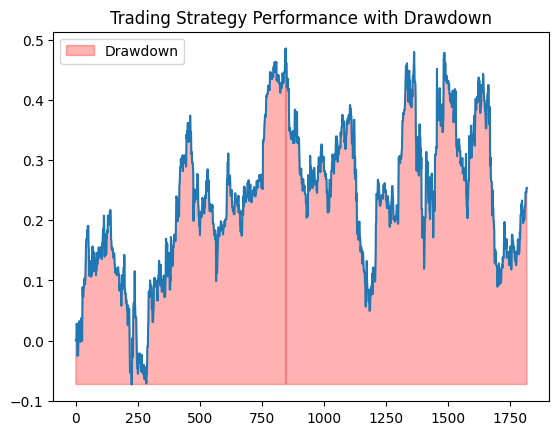

In [99]:
max_drawdown = performance_df['Cumulative Profits'].max() - performance_df['Cumulative Profits'].min()

print("Maximum Drawdown:", max_drawdown)

# drawdown curve
plt.plot(performance_df['Cumulative Profits'])
plt.fill_between(performance_df.index, performance_df['Cumulative Profits'].min(), performance_df['Cumulative Profits'], where=(performance_df['Cumulative Profits'] < performance_df['Cumulative Profits'].max()), color='red', alpha=0.3, label='Drawdown')
plt.legend()
plt.title('Trading Strategy Performance with Drawdown')
plt.show()

The chart above depicts the performance of a trading strategy, including the drawdown.
The max drawdown is 0.558. This suggests that at some point, the trading strategy's cumulative earnings decreased by 55.8% from peak to trough.
The blue line represents the trading strategy's cumulative gains over time. The red shaded region depicts the drawdown, or the gap between the current cumulative profit and the highest cumulative profit ever obtained. The deeper the red region, the greater the drawdown.


In [100]:
df.head()

,date,tweet_list,Open,High,Low,Close,Adj Close,Volume,Daily Return,tokenized_tweet_list,...,negative_count,neutral_count,positive_sentiment,negative_sentiment,neutral_sentiment,overall_sentiment,sentiment_label,affin_scores,Mean Affin Sentiment,text
1,2015-01-02,[either way yoyou're a winnah. rt : if dollar...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,NaN,"[[either, way, yoyou, 're, winnah, rt, dollar,...",...,123,443,0.6369,-0.2263,0.0,0.189010,Positive,"[0.0, 0.6369, 0.0, 0.0, 0.4215, 0.0, -0.2263, ...",0.109639,"['either', 'way', 'yoyou', ""'re"", 'winnah', 'r..."
2,2015-01-03,[“icycle: on thin ice” is this week’s free apa...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[“, icycle, thin, ice, ”, week, ’, free, apag...",...,27,134,0.5106,-0.3182,0.0,0.248178,Positive,"[0.5106, 0.5106, 0.0, 0.6908, 0.0, 0.0, 0.0, 0...",0.233963,"['“', 'icycle', 'thin', 'ice', '”', 'week', '’..."
3,2015-01-04,[today in 1977 - apagesle compyouter is incorp...,27.8475,27.860001,26.837500,27.332500,24.402174,212818400.0,0.000000,"[[today, 1977, apagesle, compyouter, incorpora...",...,29,175,0.5106,-0.6908,0.0,0.204700,Positive,"[0.0, 0.5106, 0.0, 0.3818, 0.0, 0.7906, 0.5106...",0.217757,"['today', '1977', 'apagesle', 'compyouter', 'i..."
4,2015-01-05,[storiginal contentk contest!! pi seek dollar...,27.0725,27.162500,26.352501,26.562500,23.714724,257142000.0,-2.817159,"[[storiginal, contentk, contest, pi, seek, dol...",...,168,556,0.7964,-0.4767,0.0,0.223881,Positive,"[0.7964, 0.7964, 0.5859, 0.7964, 0.5106, 0.796...",0.137332,"['storiginal', 'contentk', 'contest', 'pi', 's..."
5,2015-01-06,[#toptickertweets dollar spy dollar imrs do...,26.6350,26.857500,26.157499,26.565001,23.716955,263188400.0,0.009416,"[[toptickertweets, dollar, spy, dollar, imrs, ...",...,133,562,0.4019,-0.1779,0.0,0.147294,Positive,"[0.0, 0.0, 0.0, 0.0, 0.4019, 0.6369, 0.5106, 0...",0.159660,"['toptickertweets', 'dollar', 'spy', 'dollar',..."


# Conclusion

In this assignment, we investigated the use of text analytics tools to forecast stock price variations for Apple Inc. by monitoring sentiment in news articles and social media. The major goal was to preprocess historical stock data, apply text analytics methods, create predictive models, evaluate their performance, and determine possible profits and variability.

We chose Apple Inc. as the publicly traded stock for our investigation, gathering historical stock data as well as pertinent textual data from news articles and social media mentions. The preprocessing phase included substantial text normalization, tokenization, stopword removal, and stemming/lemmatization to ensure the dataset was suitable for successful sentiment analysis. Missing data were treated meticulously to ensure the dataset's integrity.

For sentiment analysis, we used pre-trained models to calculate sentiment scores for each piece of textual data, which were classified as positive, negative, or neutral. This classification supplied information about market attitude toward Apple Inc. and worked as a predictor of stock price fluctuations. The sentiment research demonstrated that market sentiment has a considerable impact on stock prices.

To prevent data leaking during the model-building phase, we divided the dataset into training and testing sets using a time-series split. We tried out numerous machine learning methods, including Linear Regression, Random Forest Classifier, and Time Series Model. Each model was tested using metrics like RMSE, MSE, MAE and R^2. By looking at the results of the metrics, we identified the best-performing model which is the Linear Regression for predicting stock price changes using sentiment data.

We evaluated the models to determine potential gains and variations in profitability depending on the projections. Hypothetical trading earnings and losses were produced to assess the models' resilience and practical usefulness in real-world trading settings. This review gave a thorough grasp of the models' performance and potential impact on trading strategies.

Overall, this assignment illustrated the value of incorporating text analytics and sentiment research into stock market trading. We created predictive algorithms that can forecast stock price movements. The findings highlight text analytics' potential to improve trading tactics and stock market predictions, implying that sentiment analysis can be an effective tool for making educated trading decisions.
